In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import matplotlib as mpl  # for formatting xticks into thousands
import operator # for sorting dict. NOTE: becomes list of tuples
from tqdm import *
import pickle
from datetime import datetime
import datetime # redundant? 
import plotly.plotly as py

In [2]:
# you need to login to plotpl api key
import plotly as py1
py1.tools.set_credentials_file(username='CleanData',api_key='tt3PmRCW8uc3FowXCDZ7')

In [3]:
def set_my_palette():
    sb.set()
    current_palette = sb.color_palette(my_palette)
    sb.set_palette(current_palette)

In [4]:
# choose color https://www.w3schools.com/colors/colors_picker.asp
my_palette = ['#4da6ff', '#00b386', '#ff6666', '#ffff66', '#8c66ff', '#4dffd2']
set_my_palette()
sb.set_context("talk")

In [5]:
base_color = sb.color_palette()[0]

In [6]:
def pretty_number(x):
     return "{:,.0f}".format(x)   
    


In [7]:
y_2008_full_df = pd.read_csv('../raw_data/2008/2008.csv')
carriers_df = pd.read_csv('../raw_data/supplement/carriers.csv')
airports_df = pd.read_csv('../raw_data/supplement/airports.csv')

In [8]:
#y_2008_df = y_2008_full_df.sample(frac=0.1,replace=False)
#y_2008_df = y_2008_full_df.sample(frac=0.025,replace=False)
#y_2008_df = y_2008_full_df.sample(frac=0.01,replace=False)
y_2008_df = y_2008_full_df

In [9]:
y_2008_df = y_2008_df[y_2008_df.Month==1]  # Just january

In [322]:
y_2008_df.shape[0]

602914

In [323]:
y_2008_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


#### <a href='https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True'>Link to data</a>

# Preliminary

In [10]:
y_2008_df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [11]:
y_2008_df = y_2008_df.reset_index().drop('index',axis=1)
y_2008_df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [12]:
y_2008_df.shape[0]

605765

In [13]:
y_2008_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605765 entries, 0 to 605764
Data columns (total 29 columns):
Year                 605765 non-null int64
Month                605765 non-null int64
DayofMonth           605765 non-null int64
DayOfWeek            605765 non-null int64
DepTime              588457 non-null float64
CRSDepTime           605765 non-null int64
ArrTime              587130 non-null float64
CRSArrTime           605765 non-null int64
UniqueCarrier        605765 non-null object
FlightNum            605765 non-null int64
TailNum              595813 non-null object
ActualElapsedTime    587130 non-null float64
CRSElapsedTime       605659 non-null float64
AirTime              587130 non-null float64
ArrDelay             587130 non-null float64
DepDelay             588457 non-null float64
Origin               605765 non-null object
Dest                 605765 non-null object
Distance             605765 non-null int64
TaxiIn               587130 non-null float64
TaxiOut  

# Investigating DepDelay and ArrDelay
- Because Delays are one of our main topic of interests, I would begin by investigating DepDelay and ArrDelay.

In [14]:
y_2008_df.DepDelay.dtypes, y_2008_df.ArrDelay.dtypes

(dtype('float64'), dtype('float64'))

> Both are floats. So can perform addition and subtraction on them

In [15]:
cols = ['DepTime','CRSDepTime','DepDelay','ArrTime','CRSArrTime','ArrDelay']

In [16]:
y_2008_df[cols].head(10)

,DepTime,CRSDepTime,DepDelay,ArrTime,CRSArrTime,ArrDelay
0,2003.0,1955,8.0,2211.0,2225,-14.0
1,754.0,735,19.0,1002.0,1000,2.0
2,628.0,620,8.0,804.0,750,14.0
3,926.0,930,-4.0,1054.0,1100,-6.0
4,1829.0,1755,34.0,1959.0,1925,34.0
5,1940.0,1915,25.0,2121.0,2110,11.0
6,1937.0,1830,67.0,2037.0,1940,57.0
7,1039.0,1040,-1.0,1132.0,1150,-18.0
8,617.0,615,2.0,652.0,650,2.0
9,1620.0,1620,0.0,1639.0,1655,-16.0


In [17]:
y_2008_df.DepTime[:10] - y_2008_df.CRSDepTime[:10]

0     48.0
1     19.0
2      8.0
3     -4.0
4     74.0
5     25.0
6    107.0
7     -1.0
8      2.0
9      0.0
dtype: float64

In [18]:
y_2008_df.ArrTime[:10] - y_2008_df.CRSArrTime[:10]

0   -14.0
1     2.0
2    54.0
3   -46.0
4    34.0
5    11.0
6    97.0
7   -18.0
8     2.0
9   -16.0
dtype: float64

> Compare with above table. There are errors. So I have to manuually calculate DepDelay and ArrDelay

# 2. Convert into DateTime Object
https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

- To calculate DepDelay and ArrDelay manually, we need to reformat our data into datetime object. Without reformatting, it would be downright difficult to do it.

## 2.1 Combine Year, Month and DayofMonth

In [19]:
y_2008_df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [20]:
y_2008_df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


#### Define

- We want to combine columns Year, Month and DayofMonth.
- For example: 2008-05-02

#### Code

In [21]:
y_2008_df.Year = y_2008_df.Year.astype('str')
y_2008_df.Month = y_2008_df.Month.astype('str')
y_2008_df.DayofMonth = y_2008_df.DayofMonth.astype('str')

In [22]:
combined_date = y_2008_df.Year + "-" + y_2008_df.Month + "-" + y_2008_df.DayofMonth

In [23]:
# then make it into datetime object
y_2008_df['CombinedDate'] = pd.to_datetime(combined_date)

#### Test

In [24]:
cols_to_test = ['Year','Month','DayofMonth','CombinedDate']

In [25]:
y_2008_df[cols_to_test].head(10)

,Year,Month,DayofMonth,CombinedDate
0,2008,1,3,2008-01-03
1,2008,1,3,2008-01-03
2,2008,1,3,2008-01-03
3,2008,1,3,2008-01-03
4,2008,1,3,2008-01-03
5,2008,1,3,2008-01-03
6,2008,1,3,2008-01-03
7,2008,1,3,2008-01-03
8,2008,1,3,2008-01-03
9,2008,1,3,2008-01-03


In [26]:
y_2008_df.CombinedDate.isnull().sum()

0

- Great! All converted into datetime object. And there is no null values.

## 2.2 Convert DepTime into DateTime object

In [27]:
y_2008_df[['CombinedDate','DepTime']].head(5)

,CombinedDate,DepTime
0,2008-01-03,2003.0
1,2008-01-03,754.0
2,2008-01-03,628.0
3,2008-01-03,926.0
4,2008-01-03,1829.0


#### Define
- We want to convert DepTime into DateTime object.
- For example: 2008-05-02 05:54

#### Code

In [28]:
# convert into string
y_2008_df.DepTime = y_2008_df.DepTime.astype('str')

In [29]:
y_2008_df.DepTime.head(3)

0    2003.0
1     754.0
2     628.0
Name: DepTime, dtype: object

In [30]:
# split string by a period.  get the first element
y_2008_df.DepTime.str.split('.').apply(lambda x: x[0]).head(3)

0    2003
1     754
2     628
Name: DepTime, dtype: object

In [31]:
# inplace = True
y_2008_df.DepTime = y_2008_df.DepTime.str.split('.').apply(lambda x: x[0])

In [32]:
def add_leading_zeros(element):
    numStr=element
    if numStr=='nan':
        numStr = np.NaN
    else:
        numStr = element.rjust(4,'0')
    #print(numStr)
    return numStr

In [33]:
# add leading zeros
y_2008_df.DepTime = y_2008_df.DepTime.apply(add_leading_zeros)

In [34]:
y_2008_df.DepTime.sample(5)

331296    1013
291093    1601
133931    1750
156945    0755
551723    1528
Name: DepTime, dtype: object

In [35]:
# now add colon

In [36]:
def add_colon(element):
    element = str(element)
    numStr = element
    if element == 'nan':
        numStr=np.NaN
    else:
        element = str(element)
        numStr = element[:2]+':'+element[2:]
    return numStr

In [37]:
y_2008_df.DepTime = y_2008_df.DepTime.apply(add_colon)
y_2008_df.DepTime.sample(5)

442427    16:22
558026    19:34
215435    16:06
101898    16:45
221558    15:12
Name: DepTime, dtype: object

In [38]:
# Now combine CombineDateTime and DepTime and make it a datetime object

In [39]:
date_list = []
for indx,val in enumerate(y_2008_df.DepTime):
    #print(val)
    if val == 0:
        #print('null')
        date_list.append(pd.NaT)  # somehow for datetime NaT is equivalent to NaN
    else:
        date_list.append( y_2008_df.loc[indx,'Year'] + "-" + y_2008_df.loc[indx,'Month']\
                 + "-" + y_2008_df.loc[indx,'DayofMonth'] + " " + str(val))
        

In [40]:
y_2008_df['DepTime'] = date_list

In [41]:
# convert into DateTime object
y_2008_df['DepTime']=pd.to_datetime(y_2008_df.DepTime,errors='coerce')

#### Test

In [42]:
y_2008_df.DepTime.sample(5)

528309   2008-01-19 10:41:00
424954   2008-01-01 14:33:00
501865   2008-01-12 08:50:00
409745   2008-01-03 18:00:00
390530   2008-01-31 21:13:00
Name: DepTime, dtype: datetime64[ns]

## 2.3 Convert ArrTime into DateTime object

In [43]:
y_2008_df[['CombinedDate','ArrTime']].head(5)

,CombinedDate,ArrTime
0,2008-01-03,2211.0
1,2008-01-03,1002.0
2,2008-01-03,804.0
3,2008-01-03,1054.0
4,2008-01-03,1959.0


#### Define
- We want to convert ArrTime into DateTime object.
- For example: 2008-08-17 14:08

#### Code

In [44]:
# convert into string
y_2008_df.ArrTime = y_2008_df.ArrTime.astype('str')

In [45]:
y_2008_df.ArrTime.head(3)

0    2211.0
1    1002.0
2     804.0
Name: ArrTime, dtype: object

In [46]:
# split string by a period.  get the first element
y_2008_df.ArrTime.str.split('.').apply(lambda x: x[0]).head(3)

0    2211
1    1002
2     804
Name: ArrTime, dtype: object

In [47]:
# inplace = True
y_2008_df.ArrTime = y_2008_df.ArrTime.str.split('.').apply(lambda x: x[0])

In [48]:
# add leading zeros
y_2008_df.ArrTime = y_2008_df.ArrTime.apply(add_leading_zeros)

In [49]:
y_2008_df.ArrTime.sample(5)

407588    1143
185764    0933
207005    2015
97918     1500
263566    1137
Name: ArrTime, dtype: object

In [50]:
# Now add colon

In [51]:
y_2008_df.ArrTime = y_2008_df.ArrTime.apply(add_colon)
y_2008_df.ArrTime.sample(5)

294736    22:30
459041    14:12
425068    18:16
465747      NaN
202518    12:04
Name: ArrTime, dtype: object

In [52]:
# Now combine CombineDateTime and ArrTime and make it a datetime object

In [53]:
date_list = []
for indx,val in enumerate(y_2008_df.ArrTime):
    #print(val)
    if val == 0:
        #print('null')
        date_list.append(pd.NaT)  # somehow for datetime NaT is equivalent to NaN
    else:
        date_list.append( y_2008_df.loc[indx,'Year'] + "-" + y_2008_df.loc[indx,'Month']\
                 + "-" + y_2008_df.loc[indx,'DayofMonth'] + " " + str(val))

In [54]:
y_2008_df['ArrTime'] = date_list

In [55]:
# convert into DateTime object
y_2008_df['ArrTime']=pd.to_datetime(y_2008_df.ArrTime,errors='coerce')

#### Test

In [56]:
y_2008_df.ArrTime.sample(5)

215982                   NaT
51387    2008-01-18 17:25:00
205133   2008-01-23 20:13:00
33112    2008-01-13 14:39:00
561088   2008-01-28 07:48:00
Name: ArrTime, dtype: datetime64[ns]

## 2.4 Convert CRSDepTime into DateTime object

#### Define
- We want to convert CRSDepTime into DateTime object.

#### Code

In [57]:
# convert into string
y_2008_df.CRSDepTime = y_2008_df.CRSDepTime.astype('str')

In [58]:
# inplace = True
y_2008_df.CRSDepTime = y_2008_df.CRSDepTime.str.split('.').apply(lambda x: x[0])

In [59]:
# add leading zeros
y_2008_df.CRSDepTime = y_2008_df.CRSDepTime.apply(add_leading_zeros)

In [60]:
y_2008_df.CRSDepTime = y_2008_df.CRSDepTime.apply(add_colon)
y_2008_df.CRSDepTime.sample(5)

361847    17:45
33826     15:40
368995    18:46
330348    15:55
28986     15:35
Name: CRSDepTime, dtype: object

In [61]:
# Now combine CombineDateTime and CRSDepTime and make it a datetime object

In [62]:
date_list = []
for indx,val in enumerate(y_2008_df.CRSDepTime):
    #print(val)
    if val == 0:
        #print('null')
        date_list.append(pd.NaT)  # somehow for datetime NaT is equivalent to NaN
    else:
        date_list.append( y_2008_df.loc[indx,'Year'] + "-" + y_2008_df.loc[indx,'Month']\
                 + "-" + y_2008_df.loc[indx,'DayofMonth'] + " " + str(val))

In [63]:
y_2008_df['CRSDepTime'] = date_list

In [64]:
# convert into DateTime object
y_2008_df['CRSDepTime']=pd.to_datetime(y_2008_df.CRSDepTime,errors='coerce')

#### Test

In [65]:
y_2008_df.CRSDepTime.sample(5)

483262   2008-01-08 17:10:00
387171   2008-01-13 18:05:00
258785   2008-01-02 06:50:00
489531   2008-01-01 21:40:00
594078   2008-01-06 08:00:00
Name: CRSDepTime, dtype: datetime64[ns]

## 2.5 Convert CRSArrTime into DateTime object

#### Define
- We want to convert CRSArrTime into DateTime object.

#### Code

In [66]:
# convert into string
y_2008_df.CRSArrTime = y_2008_df.CRSArrTime.astype('str')

In [67]:
# inplace = True
y_2008_df.CRSArrTime = y_2008_df.CRSArrTime.str.split('.').apply(lambda x: x[0])

In [68]:
# add leading zeros
y_2008_df.CRSArrTime = y_2008_df.CRSArrTime.apply(add_leading_zeros)

In [69]:
y_2008_df.CRSArrTime = y_2008_df.CRSArrTime.apply(add_colon)
y_2008_df.CRSArrTime.sample(5)

586202    10:54
14086     16:55
598282    11:33
162434    14:43
496865    20:35
Name: CRSArrTime, dtype: object

In [70]:
# Now combine CombineDateTime and CRSArrTime and make it a datetime object

In [71]:
date_list = []
for indx,val in enumerate(y_2008_df.CRSArrTime):
    #print(val)
    if val == 0:
        #print('null')
        date_list.append(pd.NaT)  # somehow for datetime NaT is equivalent to NaN
    else:
        date_list.append( y_2008_df.loc[indx,'Year'] + "-" + y_2008_df.loc[indx,'Month']\
                 + "-" + y_2008_df.loc[indx,'DayofMonth'] + " " + str(val))

In [72]:
y_2008_df['CRSArrTime'] = date_list

In [73]:
# convert into DateTime object
y_2008_df['CRSArrTime']=pd.to_datetime(y_2008_df.CRSArrTime,errors='coerce')

#### Test

In [74]:
y_2008_df.CRSArrTime.sample(5)

597480   2008-01-08 14:17:00
228372   2008-01-09 13:45:00
79897    2008-01-27 10:50:00
108879   2008-01-22 11:00:00
469620   2008-01-15 12:35:00
Name: CRSArrTime, dtype: datetime64[ns]

# 3. Manually Calculating DepDelay and ArrDelay
- Now that we have converted necessary columns into DateTime object, it's time to manually calculuate DepDelay and ArrDelay.

In [75]:
# return in minutes between two dates -- d1 - d2
def days_between(d1,d2):
    if (pd.isnull(d1)) | (pd.isnull(d2)):
        #print('null')
        return np.NaN
    return ((d1 - d2).total_seconds())/60

## 3.1 DepDelay
#### Define
- Calculate manually DepDelay by subtracting DepTime from CRSDepTime

In [76]:
y_2008_df.DepTime[0],y_2008_df.CRSDepTime[0]

(Timestamp('2008-01-03 20:03:00'), Timestamp('2008-01-03 19:55:00'))

In [77]:
days_between(y_2008_df.DepTime[0],y_2008_df.CRSDepTime[0])

8.0

- Inspect the above result. Is the answer correct?
- Now do this for all rows !

#### Code

In [78]:
# Calculate DepDelays for all rows manually
diff_list = []
for val1,val2 in zip(y_2008_df.DepTime,y_2008_df.CRSDepTime):
    diff_list.append(days_between(val1,val2))

In [79]:
# Create a new column 'DepDelayM' and store the new calculated Delays
y_2008_df['DepDelayM']=diff_list

#### Visual Inspection

In [80]:
cols = ['DepTime','CRSDepTime','DepDelayM','DepDelay']
y_2008_df[cols].head(10)

,DepTime,CRSDepTime,DepDelayM,DepDelay
0,2008-01-03 20:03:00,2008-01-03 19:55:00,8.0,8.0
1,2008-01-03 07:54:00,2008-01-03 07:35:00,19.0,19.0
2,2008-01-03 06:28:00,2008-01-03 06:20:00,8.0,8.0
3,2008-01-03 09:26:00,2008-01-03 09:30:00,-4.0,-4.0
4,2008-01-03 18:29:00,2008-01-03 17:55:00,34.0,34.0
5,2008-01-03 19:40:00,2008-01-03 19:15:00,25.0,25.0
6,2008-01-03 19:37:00,2008-01-03 18:30:00,67.0,67.0
7,2008-01-03 10:39:00,2008-01-03 10:40:00,-1.0,-1.0
8,2008-01-03 06:17:00,2008-01-03 06:15:00,2.0,2.0
9,2008-01-03 16:20:00,2008-01-03 16:20:00,0.0,0.0


- Mostly identical DepDelay and DepDelayM columns

#### Now what is the percentage of identical DepDelayM and DepDelay?

In [81]:
y_2008_df[(y_2008_df.DepDelay == y_2008_df.DepDelayM)\
             &(~y_2008_df.DepDelay.isnull())\
             &(~y_2008_df.DepDelayM.isnull())][cols].sample(5)

,DepTime,CRSDepTime,DepDelayM,DepDelay
300767,2008-01-02 11:55:00,2008-01-02 11:45:00,10.0,10.0
46025,2008-01-17 05:57:00,2008-01-17 06:00:00,-3.0,-3.0
383208,2008-01-11 12:58:00,2008-01-11 13:00:00,-2.0,-2.0
139290,2008-01-15 09:34:00,2008-01-15 09:30:00,4.0,4.0
514991,2008-01-03 11:27:00,2008-01-03 11:30:00,-3.0,-3.0


In [82]:
y_2008_df[(y_2008_df.DepDelay == y_2008_df.DepDelayM)\
             &(~y_2008_df.DepDelay.isnull())\
             &(~y_2008_df.DepDelayM.isnull())].shape[0], y_2008_df.shape[0]

(587041, 605765)

- Around 95% is identical. 
- Therefore we still need to investigate the differences in columns between DepDelay and DepDelayM

#### What is the percentage of non-identical DepDelayM and DepDelay?

In [83]:
y_2008_df[(y_2008_df.DepDelay != y_2008_df.DepDelayM)\
             &(~y_2008_df.DepDelay.isnull())\
             &(~y_2008_df.DepDelayM.isnull())].shape[0], y_2008_df.shape[0]

(1370, 605765)

- 0.3% where DepDelayM and DepDelay is not identical!

In [84]:
y_2008_df[(y_2008_df.DepDelay != y_2008_df.DepDelayM)\
             &(~y_2008_df.DepDelay.isnull())\
             &(~y_2008_df.DepDelayM.isnull())][cols].sample(10)

,DepTime,CRSDepTime,DepDelayM,DepDelay
475355,2008-01-25 06:42:00,2008-01-25 16:05:00,-563.0,877.0
547033,2008-01-02 00:17:00,2008-01-02 20:50:00,-1233.0,207.0
289555,2008-01-27 03:25:00,2008-01-27 23:59:00,-1234.0,206.0
346990,2008-01-03 00:07:00,2008-01-03 20:10:00,-1203.0,237.0
206516,2008-01-24 00:35:00,2008-01-24 22:53:00,-1338.0,102.0
558578,2008-01-23 00:23:00,2008-01-23 23:05:00,-1362.0,78.0
146980,2008-01-25 00:20:00,2008-01-25 21:54:00,-1294.0,146.0
78444,2008-01-27 00:36:00,2008-01-27 21:55:00,-1279.0,161.0
479447,2008-01-30 00:25:00,2008-01-30 23:55:00,-1410.0,30.0
79892,2008-01-27 00:18:00,2008-01-27 21:10:00,-1252.0,188.0


> Looking at the table above, we can see that CRSDepTime is scheduled at night but the DepTime happened a day before CRSDepTime. Therefore, to fix this error, we need to forward DepTime by one day.

#### Define
- Fixing when DepDelayM and DepDelay is not identical (This consists of only approximately 0.3% of our total data!)
- This is done by forwarding DepTime by one day. Then we need to re-calculate DepDelayM.

#### Code

In [85]:
indx_forward_one = y_2008_df[(y_2008_df.DepDelay != y_2008_df.DepDelayM)\
             &(~y_2008_df.DepDelay.isnull())\
             &(~y_2008_df.DepDelayM.isnull())][cols].index

In [86]:
# Forwward DepTime within index by oneday
for indx in indx_forward_one:
    y_2008_df.loc[indx,'DepTime'] += datetime.timedelta(days=1)

In [87]:
# Recalculate Delay in mins
for indx in indx_forward_one:
    val1=y_2008_df.loc[indx,'DepTime']
    val2=y_2008_df.loc[indx,'CRSDepTime']
    diff_min = days_between(val1,val2)
    y_2008_df.loc[indx,'DepDelayM'] = diff_min

#### Test

In [88]:
y_2008_df[(y_2008_df.DepDelay != y_2008_df.DepDelayM)\
             &(~y_2008_df.DepDelay.isnull())\
             &(~y_2008_df.DepDelayM.isnull())].shape[0], y_2008_df.shape[0]

(0, 605765)

In [89]:
y_2008_df[(y_2008_df.DepDelay != y_2008_df.DepDelayM)\
             &(~y_2008_df.DepDelay.isnull())\
             &(~y_2008_df.DepDelayM.isnull())][cols]

,DepTime,CRSDepTime,DepDelayM,DepDelay


> So, I managed to reduce to a few rows. (depends on random sample) I won't recalculate DepDelayM anymore since this consists of only a miniscule of our data. The best action to take now is to drop these rows.

In [90]:
indx_to_del = y_2008_df[(y_2008_df.DepDelay != y_2008_df.DepDelayM)\
             &(~y_2008_df.DepDelay.isnull())\
             &(~y_2008_df.DepDelayM.isnull())][cols].index

In [91]:
y_2008_df.drop(index=indx_to_del,axis=0,inplace=True)

In [92]:
y_2008_df = y_2008_df.reset_index().drop('index',axis=1)

In [93]:
y_2008_df[(y_2008_df.DepDelay != y_2008_df.DepDelayM)\
             &(~y_2008_df.DepDelay.isnull())\
             &(~y_2008_df.DepDelayM.isnull())][cols].shape[0]

0

> So columns DepDelay and DepDelayM are all identical (when DepDelay and DepDelayM are not null)

## 3.2 ArrDelay
#### Define
- Calculate manually ArrDelay by subtracting ArrTime from CRSArrTime

In [94]:
y_2008_df.ArrTime[0],y_2008_df.CRSArrTime[0]

(Timestamp('2008-01-03 22:11:00'), Timestamp('2008-01-03 22:25:00'))

In [95]:
days_between(y_2008_df.ArrTime[0],y_2008_df.CRSArrTime[0])

-14.0

- Inspect the above result. Is the answer correct?
- Now do this for all rows !

#### Code

In [96]:
# Calculate ArrDelays for all rows manually
diff_list = []
for val1,val2 in zip(y_2008_df.ArrTime,y_2008_df.CRSArrTime):
    diff_list.append(days_between(val1,val2))

In [97]:
# Create a new column 'ArrDelayM' and store the new calculated Delays
y_2008_df['ArrDelayM']=diff_list

#### Visual Inspection

In [98]:
cols = ['ArrTime','CRSArrTime','ArrDelayM','ArrDelay']
y_2008_df[cols].head(10)

,ArrTime,CRSArrTime,ArrDelayM,ArrDelay
0,2008-01-03 22:11:00,2008-01-03 22:25:00,-14.0,-14.0
1,2008-01-03 10:02:00,2008-01-03 10:00:00,2.0,2.0
2,2008-01-03 08:04:00,2008-01-03 07:50:00,14.0,14.0
3,2008-01-03 10:54:00,2008-01-03 11:00:00,-6.0,-6.0
4,2008-01-03 19:59:00,2008-01-03 19:25:00,34.0,34.0
5,2008-01-03 21:21:00,2008-01-03 21:10:00,11.0,11.0
6,2008-01-03 20:37:00,2008-01-03 19:40:00,57.0,57.0
7,2008-01-03 11:32:00,2008-01-03 11:50:00,-18.0,-18.0
8,2008-01-03 06:52:00,2008-01-03 06:50:00,2.0,2.0
9,2008-01-03 16:39:00,2008-01-03 16:55:00,-16.0,-16.0


- Mostly identical DepDelay and DepDelayM columns

#### Now what is the percentage of identical ArrDelayM and ArrDelay?

In [99]:
y_2008_df[(y_2008_df.ArrDelay == y_2008_df.ArrDelayM)\
             &(~y_2008_df.ArrDelay.isnull())\
             &(~y_2008_df.ArrDelayM.isnull())][cols].sample(5)

,ArrTime,CRSArrTime,ArrDelayM,ArrDelay
200473,2008-01-20 14:25:00,2008-01-20 14:26:00,-1.0,-1.0
430376,2008-01-28 15:57:00,2008-01-28 15:58:00,-1.0,-1.0
13313,2008-01-07 17:33:00,2008-01-07 17:40:00,-7.0,-7.0
229465,2008-01-01 14:25:00,2008-01-01 14:09:00,16.0,16.0
256848,2008-01-01 17:05:00,2008-01-01 17:14:00,-9.0,-9.0


In [100]:
y_2008_df[(y_2008_df.ArrDelay == y_2008_df.ArrDelayM)\
             &(~y_2008_df.ArrDelay.isnull())\
             &(~y_2008_df.ArrDelayM.isnull())].shape[0], y_2008_df.shape[0]

(579318, 605765)

- Around 95% is identical.(depends on random samples)
- Therefore we still need to investigate the differences in columns between ArrDelay and ArrDelayM

#### What is the percentage of non-identical ArrDelayM and ArrDelay?

In [101]:
y_2008_df[(y_2008_df.ArrDelay != y_2008_df.ArrDelayM)\
             &(~y_2008_df.ArrDelay.isnull())\
             &(~y_2008_df.ArrDelayM.isnull())].shape[0], y_2008_df.shape[0]

(7575, 605765)

- Around 1% (depends on random samples) where ArrDelayM and ArrDelay is not identical!

In [102]:
y_2008_df[(y_2008_df.ArrDelay != y_2008_df.ArrDelayM)\
             &(~y_2008_df.ArrDelay.isnull())\
             &(~y_2008_df.ArrDelayM.isnull())][cols].sample(10)

,ArrTime,CRSArrTime,ArrDelayM,ArrDelay
463486,2008-01-29 00:35:00,2008-01-29 23:35:00,-1380.0,60.0
66328,2008-01-23 00:21:00,2008-01-23 23:35:00,-1394.0,46.0
356977,2008-01-05 00:04:00,2008-01-05 23:57:00,-1433.0,7.0
411792,2008-01-17 01:18:00,2008-01-17 22:15:00,-1257.0,183.0
300081,2008-01-02 01:51:00,2008-01-02 22:55:00,-1264.0,176.0
300183,2008-01-02 00:34:00,2008-01-02 23:40:00,-1386.0,54.0
584462,2008-01-03 00:28:00,2008-01-03 22:05:00,-1297.0,143.0
279435,2008-01-19 00:28:00,2008-01-19 23:57:00,-1409.0,31.0
363077,2008-01-14 00:11:00,2008-01-14 23:25:00,-1394.0,46.0
519617,2008-01-27 00:23:00,2008-01-27 23:10:00,-1367.0,73.0


> Looking at the table above, erros occur because ArrTime should happen the next early morning. Therefore just forward ArrTime by one day to fix this error.

#### Define
- We need to forward ArrTime by one day. Then we need to re-calculate ArrDelayM.

#### Code

In [103]:
indx_forward_one = y_2008_df[(y_2008_df.ArrDelay != y_2008_df.ArrDelayM)\
             &(~y_2008_df.ArrDelay.isnull())\
             &(~y_2008_df.ArrDelayM.isnull())][cols].index

In [104]:
# Forwward ArrTime within index by oneday
for indx in indx_forward_one:
    y_2008_df.loc[indx,'ArrTime'] += datetime.timedelta(days=1)

In [105]:
# Recalculate Delay in mins
for indx in indx_forward_one:
    val1=y_2008_df.loc[indx,'ArrTime']
    val2=y_2008_df.loc[indx,'CRSArrTime']
    diff_min = days_between(val1,val2)
    y_2008_df.loc[indx,'ArrDelayM'] = diff_min

#### Test

In [106]:
y_2008_df[(y_2008_df.ArrDelay != y_2008_df.ArrDelayM)\
             &(~y_2008_df.ArrDelay.isnull())\
             &(~y_2008_df.ArrDelayM.isnull())].shape[0], y_2008_df.shape[0]

(650, 605765)

In [107]:
y_2008_df[(y_2008_df.ArrDelay != y_2008_df.ArrDelayM)\
             &(~y_2008_df.ArrDelay.isnull())\
             &(~y_2008_df.ArrDelayM.isnull())][cols].head()

,ArrTime,CRSArrTime,ArrDelayM,ArrDelay
4350,2008-01-05 23:52:00,2008-01-04 00:30:00,2842.0,-38.0
10474,2008-01-07 23:59:00,2008-01-06 00:30:00,2849.0,-31.0
13033,2008-01-08 23:48:00,2008-01-07 00:05:00,2863.0,-17.0
13175,2008-01-08 23:53:00,2008-01-07 00:05:00,2868.0,-12.0
16611,2008-01-09 23:51:00,2008-01-08 00:05:00,2866.0,-14.0


> So, I managed to reduce many rows. These rows just consist of minisclue of our data. Drop these rows.

In [108]:
indx_to_del = y_2008_df[(y_2008_df.ArrDelay != y_2008_df.ArrDelayM)\
             &(~y_2008_df.ArrDelay.isnull())\
             &(~y_2008_df.ArrDelayM.isnull())][cols].index

In [109]:
y_2008_df.drop(index=indx_to_del,axis=0,inplace=True)

In [110]:
y_2008_df = y_2008_df.reset_index().drop('index',axis=1)

In [111]:
y_2008_df[(y_2008_df.ArrDelay != y_2008_df.ArrDelayM)\
             &(~y_2008_df.ArrDelay.isnull())\
             &(~y_2008_df.ArrDelayM.isnull())].shape[0]

0

> So columns ArrDelay and ArrDelayM are all identical (when ArrDelay and ArrDelayM are not null)

#### Drop columns

In [112]:
# drop Year,Month and DayofMonth and DayOfWeek
y_2008_df.drop(columns=['Year','Month','DayofMonth','DayOfWeek'],inplace=True)

In [113]:
# drop CRSDepTime, CRSArrTime
#y_2008_df.drop(columns=['CRSDepTime','CRSArrTime',],inplace=True)

# 5. Adding Time Category
#### Add Time Category according to  this list:
- 24:00 (not 00:00) -- 02:59: Late Night <br>
- 03:00 -- 05:59: Early Morning <br>
- 06:00 -- 08:59: Morning <br>
- 09:00 -- 11:59: Late Morning <br>
- 12:00 -- 14:59: Afternoon <br>
- 15:00 -- 17:59: Late Afternoon <br>
- 18:00 -- 20:59: Evening <br>
- 21:00 -- 23:59: Night <br>

In [114]:
# hour is a string from series
def get_part_of_day(hour):
    if pd.isnull(hour):
        return np.NaN
    else:
        hour_temp = hour.strftime('%H')
        if hour_temp == '00':
            hour_int=int(0)
        else:
            hour_int = int(hour_temp)
    
    if 24 == hour_int:
        return 'Late Night'
    elif 0 <= hour_int <= 2:
        return 'Late Night'
    elif 3 <= hour_int <= 5:
        return 'Early Morning'
    elif 6 <= hour_int <= 8:
        return 'Morning'
    elif 9 <= hour_int <= 11:
        return 'Late Morning'
    elif 12 <= hour_int <= 14:
        return 'Afternoon'
    elif 15 <= hour_int <= 17:
        return 'Late Afternoon'
    elif 18 <= hour_int <= 20:
        return 'Evening'
    elif 21 <= hour_int <= 23:
        return 'Night'
    

## 5.1 DepTimeCategory

In [115]:
y_2008_df['DepTimeCategory'] = y_2008_df.loc[: ,'DepTime'].apply(get_part_of_day)

In [116]:
y_2008_df.DepTimeCategory.value_counts(dropna=False)

Late Afternoon    111941
Morning           111837
Late Morning      110957
Afternoon         109975
Evening            92549
Night              36147
NaN                17354
Early Morning      11936
Late Night          2419
Name: DepTimeCategory, dtype: int64

In [117]:
y_2008_df.DepTimeCategory.value_counts(dropna=False,normalize=True)

Late Afternoon    0.184991
Morning           0.184819
Late Morning      0.183365
Afternoon         0.181742
Evening           0.152944
Night             0.059736
NaN               0.028679
Early Morning     0.019725
Late Night        0.003998
Name: DepTimeCategory, dtype: float64

#### make DepTimeCategory into category with sorted order

In [118]:
day_categories = ['Late Night','Early Morning','Morning','Late Morning',
                 'Afternoon','Late Afternoon','Evening','Night']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    day_classes = pd.api.types.CategoricalDtype(ordered = True, categories = day_categories)
    y_2008_df['DepTimeCategory'] = y_2008_df['DepTimeCategory'].astype(day_classes)
else: # pre-v0.21
    y_2008_df['DepTimeCategory'] = y_2008_df['DepTimeCategory'].astype('category', ordered = True,
                                                         categories = day_categories)

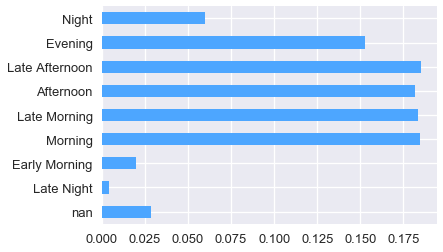

In [119]:
y_2008_df.DepTimeCategory.value_counts(dropna=False,normalize=True).sort_index()\
            .plot(kind='barh',color=base_color);

## 5.1 ArrTimeCategory

In [120]:
y_2008_df['ArrTimeCategory'] = y_2008_df.loc[: ,'ArrTime'].apply(get_part_of_day)

#### make ArrTimeCategory into category with sorted order

In [121]:
day_categories = ['Late Night','Early Morning','Morning','Late Morning',
                 'Afternoon','Late Afternoon','Evening','Night']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    day_classes = pd.api.types.CategoricalDtype(ordered = True, categories = day_categories)
    y_2008_df['ArrTimeCategory'] = y_2008_df['ArrTimeCategory'].astype(day_classes)
else: # pre-v0.21
    y_2008_df['ArrTimeCategory'] = y_2008_df['ArrTimeCategory'].astype('category', ordered = True,
                                                         categories = day_categories)

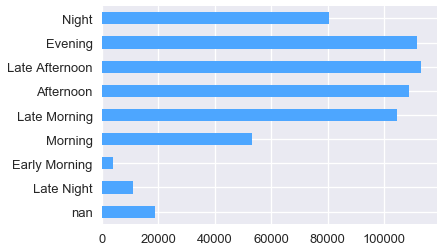

In [122]:
y_2008_df.ArrTimeCategory.value_counts(dropna=False).sort_index().plot(kind='barh',color=base_color);

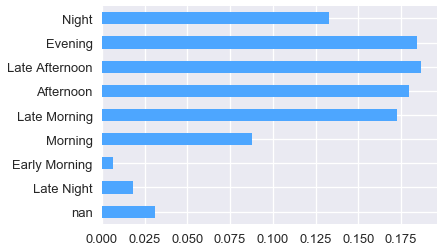

In [123]:
y_2008_df.ArrTimeCategory.value_counts(dropna=False,normalize=True).sort_index()\
        .plot(kind='barh',color=base_color);

# 6. Exploring Cancelled -- Part One

In [124]:
y_2008_df.Cancelled.value_counts(dropna=False,normalize=False)

0    587807
1     17308
Name: Cancelled, dtype: int64

In [125]:
y_2008_df.Cancelled.value_counts(dropna=False,normalize=True)

0    0.971397
1    0.028603
Name: Cancelled, dtype: float64

- There is no null values.
- Only 2% of flights are cancelled.
**(Result is dependent on random sampling)**

- Also notice that there are only two values 0s and 1s. Therefore convert Cancelled to bool

In [126]:
# changing Cancelled type to boolean
y_2008_df.Cancelled = y_2008_df.Cancelled.astype('bool')

In [127]:
# Test
y_2008_df.Cancelled.value_counts(dropna=False,normalize=True)

False    0.971397
True     0.028603
Name: Cancelled, dtype: float64

### CancellationCode

In [128]:
y_2008_df.CancellationCode.unique()

array([nan, 'A', 'C', 'B'], dtype=object)

#### Cancellation Code Legend
> A: carrier <br>
> B: weather <br>
> C: NAS <br>
> D: security <br>

In [129]:
cancelled_true_cols = ['Cancelled','CancellationCode','DepTime','ArrTime']

In [130]:
y_2008_df[y_2008_df.Cancelled==True][cancelled_true_cols].sample(10)

,Cancelled,CancellationCode,DepTime,ArrTime
175292,True,B,NaT,NaT
151237,True,A,NaT,NaT
407541,True,C,NaT,NaT
217107,True,C,NaT,NaT
63609,True,A,NaT,NaT
547923,True,A,NaT,NaT
21064,True,A,NaT,NaT
401054,True,B,NaT,NaT
561197,True,A,NaT,NaT
203303,True,A,NaT,NaT


- Notice that when Cancelled is True, there is a corresponding reason for this cancellation <br>
through CancellationCode column. The columns DepTime and ArrTime have null values. This makes <br>
sense because flight is cancelled.

#### Define
- When Cancelled==True, is there a corresponding CancellationCode?

#### Code and Test

In [131]:
y_2008_df[y_2008_df.Cancelled==True][cancelled_true_cols].shape[0]

17308

In [132]:
y_2008_df.CancellationCode.value_counts(dropna=False)

NaN    587807
B        6711
A        6635
C        3962
Name: CancellationCode, dtype: int64

- As seen from above if you add total values of A,B,C and D, it tallies with total number of data when Cancelled==True. Therefore, we can conclude that when Cancelled==True, there is a corresponding CancellationCode.

In [133]:
y_2008_df[(y_2008_df.Cancelled==True) & (y_2008_df.CancellationCode.isnull())].shape[0]

0

- Another test. If the answer is 0, then we can definitely conclude that when Cancelled==True, there is a corresponding CancellationCode.

#### Define
- When Cancelled==True, are all DepTime and ArrTime null?

#### Code

In [134]:
y_2008_df[(y_2008_df.Cancelled==True) &\
          (~y_2008_df.DepTime.isnull())].shape[0]

0

In [135]:
y_2008_df[(y_2008_df.Cancelled==True) &\
          (~y_2008_df.DepTime.isnull())][cancelled_true_cols]

,Cancelled,CancellationCode,DepTime,ArrTime


- There are cases when DepTime is not null when Cancelled is True. Need to clean this data. Need to set DepTime to null when Cancelled is True

In [136]:
y_2008_df[(y_2008_df.Cancelled==True) &\
          (~y_2008_df.ArrTime.isnull())].shape[0]

0

- All ArrTime is null when Cancelled is True (for this random sample). But I will provide code to clean this data. 

In [137]:
# get index that have problematic DepTime
tofix_index = y_2008_df[(y_2008_df.Cancelled==True) &\
          (~y_2008_df.DepTime.isnull())].index

In [138]:
# When Cancelled is True, change DepTime to NaT (null)
y_2008_df.loc[tofix_index,'DepTime'] = y_2008_df.loc[tofix_index,'DepTime'].apply(lambda x: pd.NaT)

In [139]:
tofix_index = y_2008_df[(y_2008_df.Cancelled==True) &\
          (~y_2008_df.ArrTime.isnull())].index

In [140]:
tofix_index

Int64Index([], dtype='int64')

In [141]:
# When Cancelled is True, change ArrTime to NaT (null)
y_2008_df.loc[tofix_index,'ArrTime'] = y_2008_df.loc[tofix_index,'ArrTime'].apply(lambda x: pd.NaT)

#### Test

In [142]:
y_2008_df[(y_2008_df.Cancelled==True) &\
          (~y_2008_df.DepTime.isnull())].shape[0]

0

In [143]:
y_2008_df[(y_2008_df.Cancelled==True) &\
          (~y_2008_df.ArrTime.isnull())].shape[0]

0

- When Cancelled==True, all DepTime and ArrTime is null

# 7. Exploring CancellationCode


- From previous discussion, we found out that when Cancelled==True, there is a corresponding CancellationCode. In this section we'll explore CancellationCode when Cancelled==False.

In [144]:
y_2008_df[(y_2008_df.Cancelled==False)\
          & (y_2008_df.CancellationCode.isnull())][cancelled_true_cols].sample(10)

,Cancelled,CancellationCode,DepTime,ArrTime
403861,False,NaN,2008-01-16 11:21:00,2008-01-16 13:31:00
582102,False,NaN,2008-01-05 15:44:00,2008-01-05 19:27:00
357493,False,NaN,2008-01-06 05:56:00,2008-01-06 08:34:00
532188,False,NaN,2008-01-12 19:47:00,2008-01-12 20:27:00
135138,False,NaN,2008-01-09 12:07:00,2008-01-09 12:53:00
57899,False,NaN,2008-01-21 12:04:00,2008-01-21 13:07:00
491715,False,NaN,2008-01-28 10:58:00,2008-01-28 11:58:00
361802,False,NaN,2008-01-12 18:13:00,2008-01-12 21:12:00
209268,False,NaN,2008-01-26 22:07:00,2008-01-26 23:14:00
143195,False,NaN,2008-01-20 18:20:00,2008-01-20 19:44:00


In [145]:
y_2008_df[(y_2008_df.Cancelled==False)\
          & (y_2008_df.CancellationCode.isnull())].shape[0], y_2008_df.shape[0]

(587807, 605115)

In [146]:
y_2008_df[(y_2008_df.Cancelled==False)\
          & (~y_2008_df.CancellationCode.isnull())].shape[0]

0

In [147]:
y_2008_df.CancellationCode.value_counts(dropna=False)

NaN    587807
B        6711
A        6635
C        3962
Name: CancellationCode, dtype: int64

- From the above data, when Cancellation is False, all CancellationCode is null. (Result dependent on random sampling). This is the result we want.

# 8. Exploring Diverted

In [148]:
cols = ['DepTime','ArrTime','Cancelled','CancellationCode','Diverted']

#### When Diverted == 1 and when Diverted == 0

In [149]:
y_2008_df[y_2008_df.Diverted==1][cols].sample(3)

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
96745,2008-01-24 18:53:00,NaT,False,NaN,1
335205,2008-01-16 16:30:00,NaT,False,NaN,1
476543,2008-01-26 20:54:00,NaT,False,NaN,1


In [150]:
y_2008_df[y_2008_df.Diverted==0][cols].sample(3)

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
109906,2008-01-30 06:01:00,2008-01-30 08:19:00,False,NaN,0
281255,2008-01-21 09:32:00,2008-01-21 11:23:00,False,NaN,0
35454,2008-01-14 09:22:00,2008-01-14 10:28:00,False,NaN,0


In [151]:
# Number of data when diverted == 1
y_2008_df[y_2008_df.Diverted==1][cols].shape[0],y_2008_df[y_2008_df.Diverted==0][cols].shape[0]

(1327, 603788)

In [152]:
y_2008_df.Diverted.value_counts(dropna=False)

0    603788
1      1327
Name: Diverted, dtype: int64

In [153]:
y_2008_df.Diverted.value_counts(dropna=False,normalize=True)

0    0.997807
1    0.002193
Name: Diverted, dtype: float64

>- 99.8% is when Diverted is 0.
>- Diverted==1 is 0.2%.
>- There is no null values.
> ##### (Result is dependent on random sampling)

#### When Diverted==1 and ArrTime is null / non-null

In [154]:
y_2008_df[(y_2008_df.Diverted==1)\
          &(y_2008_df.ArrTime.isnull())][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
1763,2008-01-03 09:22:00,NaT,False,NaN,1
1911,2008-01-03 23:25:00,NaT,False,NaN,1
2651,2008-01-04 19:49:00,NaT,False,NaN,1
2726,2008-01-04 07:37:00,NaT,False,NaN,1
3383,2008-01-04 09:31:00,NaT,False,NaN,1


In [155]:
y_2008_df[(y_2008_df.Diverted==1)\
          &(y_2008_df.ArrTime.isnull())][cols].shape[0],y_2008_df[y_2008_df.Diverted==1][cols].shape[0]

(1327, 1327)

- This situation (Diverted==1 and ArrTime is null) happens around 80% of the time. (Result is dependent on random sampling). This is a logical situation. When a plane is Diverted, there is no ArrTime. 

In [156]:
y_2008_df[(y_2008_df.Diverted==1)\
          &(~y_2008_df.ArrTime.isnull())][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted


In [157]:
y_2008_df[(y_2008_df.Diverted==1)\
          &(~y_2008_df.ArrTime.isnull())][cols].shape[0], y_2008_df[y_2008_df.Diverted==1][cols].shape[0]

(0, 1327)

- The proportion of non-null ArrTime given Diverted==1 is around 20%. (Result is dependent on random sampling). This is not logical. Therefore, I will clean this data. I Will make ArrTime to null when Diverted==1, which I will do below

-- **Cleaning Data**

In [158]:
indx_to_clean = y_2008_df[(y_2008_df.Diverted==1)\
          &(~y_2008_df.ArrTime.isnull())][cols].index

In [159]:
for indx in indx_to_clean:
    y_2008_df.loc[indx,'ArrTime'] = pd.NaT

In [160]:
# Test and Done!
y_2008_df[(y_2008_df.Diverted==1)\
          &(~y_2008_df.ArrTime.isnull())][cols].shape[0], y_2008_df[(y_2008_df.Diverted==1)\
          &(y_2008_df.ArrTime.isnull())][cols].shape[0]

(0, 1327)

#### When Diverted==1 and DepTime is null / non-null

In [161]:
y_2008_df[(y_2008_df.Diverted==1)\
          &(y_2008_df.DepTime.isnull())].shape[0]

0

In [162]:
y_2008_df[(y_2008_df.Diverted==1)\
          &(~y_2008_df.DepTime.isnull())].shape[0]

1327

In [163]:
y_2008_df[(y_2008_df.Diverted==1)\
          &(~y_2008_df.DepTime.isnull())][cols].sample(10)

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
124279,2008-01-08 06:23:00,NaT,False,NaN,1
180321,2008-01-07 10:27:00,NaT,False,NaN,1
200374,2008-01-20 18:50:00,NaT,False,NaN,1
235614,2008-01-02 23:00:00,NaT,False,NaN,1
134485,2008-01-08 06:40:00,NaT,False,NaN,1
568287,2008-01-09 07:20:00,NaT,False,NaN,1
289071,2008-01-27 08:14:00,NaT,False,NaN,1
543398,2008-01-26 14:17:00,NaT,False,NaN,1
151511,2008-01-02 06:50:00,NaT,False,NaN,1
211820,2008-01-28 09:41:00,NaT,False,NaN,1


- Note that when Diverted==1, all ArrTime is null and all DepTime is non-null. 

#### When Diverted==1 and DepTime non-null and Cancelled is True / False

In [164]:
y_2008_df[(y_2008_df.Diverted==1)\
          &(~y_2008_df.DepTime.isnull())\
          &(y_2008_df.Cancelled==False)][cols].sample(5)

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
93784,2008-01-31 12:25:00,NaT,False,NaN,1
30582,2008-01-12 18:43:00,NaT,False,NaN,1
134784,2008-01-08 07:00:00,NaT,False,NaN,1
3672,2008-01-04 18:49:00,NaT,False,NaN,1
397572,2008-01-26 07:27:00,NaT,False,NaN,1


In [165]:
y_2008_df[(y_2008_df.Diverted==1)\
          &(~y_2008_df.DepTime.isnull())\
          &(y_2008_df.Cancelled==False)][cols].shape[0]

1327

In [166]:
y_2008_df[(y_2008_df.Diverted==1)\
          &(~y_2008_df.DepTime.isnull())\
          &(y_2008_df.Cancelled==True)][cols]

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted


In [167]:
y_2008_df[(y_2008_df.Diverted==1)\
          &(~y_2008_df.DepTime.isnull())\
          &(y_2008_df.Cancelled==True)][cols].shape[0]

0

- This above test yields an important insight! planes that are diverted are not cancelled! <br><br>

# 9. Exploring Cancelled -- Part Two

In [168]:
cols = ['DepTime','ArrTime','Cancelled','CancellationCode','Diverted']

#### When Cancelled==True, we expect all DepTime and ArrTime is null

In [169]:
y_2008_df[(y_2008_df.Cancelled==True)\
          & (y_2008_df.DepTime.isnull())
          & (y_2008_df.ArrTime.isnull())][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
178,NaT,NaT,True,A,0
373,NaT,NaT,True,A,0
399,NaT,NaT,True,A,0
401,NaT,NaT,True,C,0
415,NaT,NaT,True,A,0


In [170]:
y_2008_df[(y_2008_df.Cancelled==True)\
          & (y_2008_df.DepTime.isnull())
          & (y_2008_df.ArrTime.isnull())][cols].shape[0]

17308

In [171]:
y_2008_df.Cancelled.value_counts(dropna=False)

False    587807
True      17308
Name: Cancelled, dtype: int64

- From the result above, we can be sure at this point that when Cancelled==True, DepTime and ArrTime is null. (for this data of random sampling)

#### When Cancelled==False, we expect DepTime and ArrTime is not null

In [172]:
y_2008_df[(y_2008_df.Cancelled==False)\
          & (~y_2008_df.DepTime.isnull())
          & (~y_2008_df.ArrTime.isnull())][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
0,2008-01-03 20:03:00,2008-01-03 22:11:00,False,NaN,0
1,2008-01-03 07:54:00,2008-01-03 10:02:00,False,NaN,0
2,2008-01-03 06:28:00,2008-01-03 08:04:00,False,NaN,0
3,2008-01-03 09:26:00,2008-01-03 10:54:00,False,NaN,0
4,2008-01-03 18:29:00,2008-01-03 19:59:00,False,NaN,0


In [173]:
y_2008_df[(y_2008_df.Cancelled==False)\
          & (~y_2008_df.DepTime.isnull())
          & (~y_2008_df.ArrTime.isnull())].shape[0]

586197

- This is what we expected. When Cancelled==False, DepTime and ArrTime is not null. This condition represent a bulk of our data, which is good.

#### When Cancelled==False and DepTime is null and ArrTime is not null
- Rows with this condition shouldn't be in our data. Therefore, drop these rows.

In [174]:
y_2008_df[(y_2008_df.Cancelled==False)\
          & (y_2008_df.DepTime.isnull())
          & (~y_2008_df.ArrTime.isnull())][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
102265,NaT,2008-01-05 03:06:00,False,NaN,0
102288,NaT,2008-01-28 03:10:00,False,NaN,0
130843,NaT,2008-01-03 02:05:00,False,NaN,0
132317,NaT,2008-01-05 02:22:00,False,NaN,0
136651,NaT,2008-01-11 01:10:00,False,NaN,0


In [175]:
y_2008_df[(y_2008_df.Cancelled==False)\
          & (y_2008_df.DepTime.isnull())
          & (~y_2008_df.ArrTime.isnull())][cols].shape[0]

46

In [176]:
indx_to_drop = y_2008_df[(y_2008_df.Cancelled==False)\
          & (y_2008_df.DepTime.isnull())
          & (~y_2008_df.ArrTime.isnull())].index

In [177]:
y_2008_df.drop(index=indx_to_drop,axis=0,inplace=True)

In [178]:
#Test
y_2008_df[(y_2008_df.Cancelled==False)\
          & (y_2008_df.DepTime.isnull())
          & (~y_2008_df.ArrTime.isnull())][cols].shape[0]

0

#### When Cancelled==False and DepTime is not null and ArrTime is null
- ArrTime shouldn't be null if Diverted==0. If Diverted==1 and ArrTime is null, it is O.K

In [179]:
y_2008_df[(y_2008_df.Cancelled==False)\
          & (~y_2008_df.DepTime.isnull())
          & (y_2008_df.ArrTime.isnull())
          & (y_2008_df.Diverted==1)][cols].sample(5)

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
391732,2008-01-27 07:10:00,NaT,False,NaN,1
201037,2008-01-21 07:31:00,NaT,False,NaN,1
2726,2008-01-04 07:37:00,NaT,False,NaN,1
527621,2008-01-27 01:03:00,NaT,False,NaN,1
396427,2008-01-18 19:45:00,NaT,False,NaN,1


In [180]:
y_2008_df[(y_2008_df.Cancelled==False)\
          & (~y_2008_df.DepTime.isnull())
          & (y_2008_df.ArrTime.isnull())
          & (y_2008_df.Diverted==1)][cols].shape[0]

1327

- This is O.K. ArrTime is null and Diverted==1. Because the plane is diverted, there is no information on ArrTime.

In [181]:
y_2008_df[(y_2008_df.Cancelled==False)\
          & (~y_2008_df.DepTime.isnull())
          & (y_2008_df.ArrTime.isnull())
          & (y_2008_df.Diverted==0)][cols].head()

,DepTime,ArrTime,Cancelled,CancellationCode,Diverted
1764,2008-01-03 22:38:00,NaT,False,NaN,0
3608,2008-01-04 18:44:00,NaT,False,NaN,0
3630,2008-01-04 19:40:00,NaT,False,NaN,0
7012,2008-01-05 22:36:00,NaT,False,NaN,0
10641,2008-01-06 21:53:00,NaT,False,NaN,0


In [182]:
y_2008_df[(y_2008_df.Cancelled==False)\
          & (~y_2008_df.DepTime.isnull())
          & (y_2008_df.ArrTime.isnull())
          & (y_2008_df.Diverted==0)][cols].shape[0]

237

- This is not O.K. There is no Cancellation and no Diversion. ArrTime shouldn't be null. Drop these rows.

In [183]:
indx_to_drop = y_2008_df[(y_2008_df.Cancelled==False)\
          & (~y_2008_df.DepTime.isnull())
          & (y_2008_df.ArrTime.isnull())
          & (y_2008_df.Diverted==0)].index

In [184]:
y_2008_df.drop(index=indx_to_drop,axis=0,inplace=True)

In [185]:
# Test
y_2008_df[(y_2008_df.Cancelled==False)\
          & (~y_2008_df.DepTime.isnull())
          & (y_2008_df.ArrTime.isnull())
          & (y_2008_df.Diverted==0)][cols].shape[0]

0

# 10. Exploring Delays

In [186]:
cols_delays = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',\
               'ArrDelayM','DepDelayM']

In [187]:
y_2008_df[cols_delays].corr()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelayM,DepDelayM
CarrierDelay,1.000000,-0.054201,-0.144244,-0.021309,-0.143342,0.499985,0.532552
WeatherDelay,-0.054201,1.000000,-0.018033,-0.007486,-0.039681,0.274735,0.247592
NASDelay,-0.144244,-0.018033,1.000000,-0.018543,-0.147983,0.358921,0.165553
SecurityDelay,-0.021309,-0.007486,-0.018543,1.000000,-0.018152,-0.011961,-0.008263
LateAircraftDelay,-0.143342,-0.039681,-0.147983,-0.018152,1.000000,0.498732,0.543608
ArrDelayM,0.499985,0.274735,0.358921,-0.011961,0.498732,1.000000,0.931371
DepDelayM,0.532552,0.247592,0.165553,-0.008263,0.543608,0.931371,1.000000


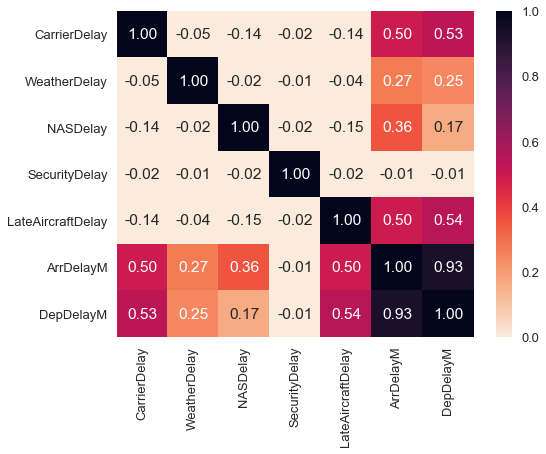

In [188]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
sb.heatmap(y_2008_df[cols_delays].corr(),annot=True,cmap='rocket_r',fmt='.2f',vmin=0);

From the above heatmap we can see that:
- a strong correlation between ArrDelayM and DepDelayM.
- a strong correlation between CarrierDelay and ArrDelayM and DepDelayM.
- a correlation between NASDelay and ArrDelayM.
- a correlation between LateAircraftDelay and ArrDelayM and DepDelayM.

#### when both ArrDelayM and DepDelayM is minus

In [189]:
y_2008_df[(y_2008_df.DepDelayM<=0)\
         & (y_2008_df.ArrDelayM<=0)][cols_delays].sample(10)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelayM,DepDelayM
220796,NaN,NaN,NaN,NaN,NaN,-3.0,-2.0
45954,NaN,NaN,NaN,NaN,NaN,-8.0,-2.0
560822,NaN,NaN,NaN,NaN,NaN,-21.0,-3.0
28307,NaN,NaN,NaN,NaN,NaN,-5.0,-4.0
101894,NaN,NaN,NaN,NaN,NaN,-6.0,-5.0
2914,NaN,NaN,NaN,NaN,NaN,-19.0,0.0
94005,NaN,NaN,NaN,NaN,NaN,-9.0,-7.0
442457,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0
473893,NaN,NaN,NaN,NaN,NaN,-8.0,-1.0
264512,NaN,NaN,NaN,NaN,NaN,-41.0,0.0


- The above table is logical, since CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay are null when there are no delays. There are no delays because ArrDelayM and DepDelayM are negative. 
- From my table, all  CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay columns are null. This depends on random sampling. Therefore it might be different for your dataset. Not all rows are null when there are no delays.

#### when both ArrDealyM and DepDelayM is positive

In [190]:
y_2008_df[(y_2008_df.DepDelayM>0)\
         & (y_2008_df.ArrDelayM>0)][cols_delays].sample(20)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelayM,DepDelayM
284784,85.0,0.0,0.0,0.0,0.0,85.0,99.0
549072,NaN,NaN,NaN,NaN,NaN,4.0,19.0
316269,NaN,NaN,NaN,NaN,NaN,5.0,4.0
297512,1.0,0.0,3.0,0.0,15.0,19.0,16.0
578988,0.0,0.0,97.0,0.0,0.0,97.0,118.0
32736,NaN,NaN,NaN,NaN,NaN,1.0,2.0
399792,NaN,NaN,NaN,NaN,NaN,1.0,3.0
201860,45.0,0.0,0.0,0.0,0.0,45.0,46.0
4993,NaN,NaN,NaN,NaN,NaN,3.0,14.0
114302,0.0,4.0,0.0,0.0,12.0,16.0,30.0


In [191]:
y_2008_df[(y_2008_df.DepDelay>0)\
         & (y_2008_df.ArrDelay>0)][cols_delays].shape[0] , y_2008_df.shape[0]

(192803, 604832)

- From the above table, the columns CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay do not give rise to a logical ArrDelayM and DepDelayM.

- This consists of about 30% of our data. If we drop these rows, we will drop many useful data.

- Also, we need more insider knowledge if we want to re-calculate these rows into a logical ones.

- Therefore instead of dropping these rows, I will drop columns CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay.

#### Dropping CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay columns.
- Although there are some strong correlations between these columns and ArrDelayM and DepDelayM columns, we need to drop them by the reasonings we just gave above.

In [192]:
#y_2008_df.drop(columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',\
#                       'LateAircraftDelay'],axis=1,inplace=True)

# 11. Exploring Carriers table
- we need to merge two tables: carriers_df and y_2008_df

In [193]:
y_2008_df.UniqueCarrier.head()

0    WN
1    WN
2    WN
3    WN
4    WN
Name: UniqueCarrier, dtype: object

- The UniqueCarrier from y_2008_df is somehow a code for carriers. We need the description of the carrier to make the data intelligible to human readers. Can we get this description from carriers_df?

In [194]:
carriers_df.Code.isin(list(y_2008_df.UniqueCarrier)).sum()

20

- The answer is Yes. We can find Carrier Description from carriers_df. This is shown below.

In [195]:
carriers_df[carriers_df.Code.isin(list(y_2008_df.UniqueCarrier))]

,Code,Description
84,9E,Pinnacle Airlines Inc.
100,AA,American Airlines Inc.
206,AQ,Aloha Airlines Inc.
221,AS,Alaska Airlines Inc.
263,B6,JetBlue Airways
377,CO,Continental Air Lines Inc.
441,DL,Delta Air Lines Inc.
505,EV,Atlantic Southeast Airlines
517,F9,Frontier Airlines Inc.
537,FL,AirTran Airways Corporation


- Therefore we need to merge carriers_df and y_2008_df. Before merging though, we need to do some data cleaning:

- First, the Description from index 1308 above is a bit too long. We need to fix it.
- Second, we need to change column names of carriers_df before merging.

#### Define
- Index 1308 of carriers_df has long Description

#### Code

In [196]:
print(carriers_df.loc[1308].values)

['US'
 'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)']


- Change the above description into 'US Airways Inc.'

In [197]:
carriers_df.iloc[1308]['Description'] = 'US Airways Inc.'

#### Test

In [198]:
print(carriers_df.loc[1308].values)

['US' 'US Airways Inc.']


#### Define
- Before we can merge y_2008_df and carriers_df, we need to change the column names of carriers_df

#### Code

In [199]:
carriers_df.columns

Index(['Code', 'Description'], dtype='object')

In [200]:
carriers_df.columns = ['UniqueCarrier','CarrierDescription']

#### Test

In [201]:
carriers_df.columns

Index(['UniqueCarrier', 'CarrierDescription'], dtype='object')

#### Define
- Merge y_2008_df and carriers_df

#### Code

In [202]:
y_2008_df = pd.merge(carriers_df,y_2008_df,on='UniqueCarrier')

#### Define

In [203]:
y_2008_df[['UniqueCarrier','CarrierDescription']].sample(5)

,UniqueCarrier,CarrierDescription
439484,US,US Airways Inc.
18830,9E,Pinnacle Airlines Inc.
361077,OO,Skywest Airlines Inc.
167720,DL,Delta Air Lines Inc.
184650,EV,Atlantic Southeast Airlines


#### Carriers Distribution
major airlines: https://en.wikipedia.org/wiki/Major_airlines_of_the_United_States

In [204]:
y_2008_df.CarrierDescription.value_counts(dropna=False)

Southwest Airlines Co.          101226
American Airlines Inc.           52351
Skywest Airlines Inc.            48970
American Eagle Airlines Inc.     43424
US Airways Inc.                  39042
Delta Air Lines Inc.             38145
United Air Lines Inc.            37959
Expressjet Airlines Inc.         35052
Northwest Airlines Inc.          30888
Continental Air Lines Inc.       25166
Atlantic Southeast Airlines      23110
Pinnacle Airlines Inc.           22843
Mesa Airlines Inc.               22104
AirTran Airways Corporation      20514
Comair Inc.                      18606
JetBlue Airways                  16356
Alaska Airlines Inc.             12691
Frontier Airlines Inc.            7681
Hawaiian Airlines Inc.            4678
Aloha Airlines Inc.               4026
Name: CarrierDescription, dtype: int64

In [205]:
y_2008_df.CarrierDescription.value_counts(dropna=False,normalize=True)

Southwest Airlines Co.          0.167362
American Airlines Inc.          0.086555
Skywest Airlines Inc.           0.080965
American Eagle Airlines Inc.    0.071795
US Airways Inc.                 0.064550
Delta Air Lines Inc.            0.063067
United Air Lines Inc.           0.062760
Expressjet Airlines Inc.        0.057953
Northwest Airlines Inc.         0.051069
Continental Air Lines Inc.      0.041608
Atlantic Southeast Airlines     0.038209
Pinnacle Airlines Inc.          0.037768
Mesa Airlines Inc.              0.036546
AirTran Airways Corporation     0.033917
Comair Inc.                     0.030762
JetBlue Airways                 0.027042
Alaska Airlines Inc.            0.020983
Frontier Airlines Inc.          0.012699
Hawaiian Airlines Inc.          0.007734
Aloha Airlines Inc.             0.006656
Name: CarrierDescription, dtype: float64

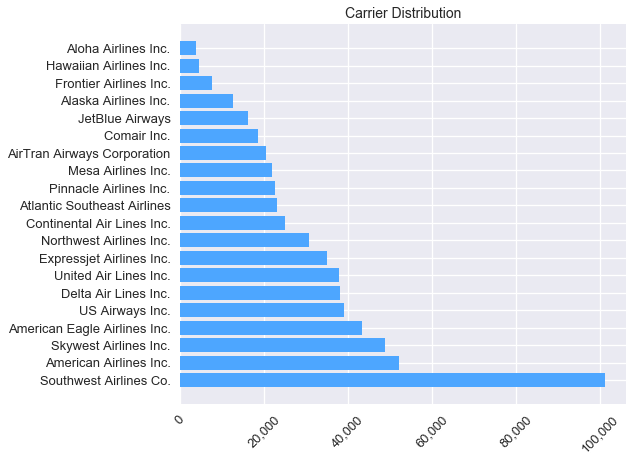

In [206]:
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(1,1,1)

plt.barh(y_2008_df.CarrierDescription.value_counts().index,y_2008_df.CarrierDescription.value_counts())

plt.yticks(fontsize=13)
plt.xticks(fontsize=13,rotation=45);
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'));
plt.title('Carrier Distribution',fontsize=14);

# 12. Exploring Airports table

In [207]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
iata       3376 non-null object
airport    3376 non-null object
city       3364 non-null object
state      3364 non-null object
country    3376 non-null object
lat        3376 non-null float64
long       3376 non-null float64
dtypes: float64(2), object(5)
memory usage: 184.7+ KB


#### Observations on airports_df:
- iata is a unique id for an airport. The equivalent ids in y_2008_df is Origin and Dest columns. So if you want to merge these two data frames (airport_df and y_2008_df), merge on iata and Origin or iata and Dest.
- The dataframe contains lat, long data. This pair of data will pinpoint the location of an airport on a map.
- The dataframe also contains the airport's name, city state and country.

#### Define
- Filter Airports that are located in the USA. Identify probelmatic data and then rectify  them.

#### Code

In [208]:
airports_df[(airports_df.country.str.contains('USA')) & (airports_df.iata.isnull())]

,iata,airport,city,state,country,lat,long


In [209]:
airports_df[(airports_df.country.str.contains('USA')) & (airports_df.airport.isnull())]

,iata,airport,city,state,country,lat,long


In [210]:
airports_df[(airports_df.country.str.contains('USA')) & (airports_df.lat.isnull())]

,iata,airport,city,state,country,lat,long


In [211]:
airports_df[(airports_df.country.str.contains('USA')) & (airports_df.long.isnull())]

,iata,airport,city,state,country,lat,long


- Columns iata, airport, country, lat and long have no null values. So all good for these columns!

In [212]:
airports_df[(airports_df.country.str.contains('USA')) & (airports_df.city.isnull())]

,iata,airport,city,state,country,lat,long
1136,CLD,MC Clellan-Palomar Airport,NaN,NaN,USA,33.127231,-117.278727
1715,HHH,Hilton Head,NaN,NaN,USA,32.224384,-80.697629
2251,MIB,Minot AFB,NaN,NaN,USA,48.415769,-101.358039
2312,MQT,Marquette County Airport,NaN,NaN,USA,46.353639,-87.395361
2752,RCA,Ellsworth AFB,NaN,NaN,USA,44.145094,-103.103567
2759,RDR,Grand Forks AFB,NaN,NaN,USA,47.961167,-97.401167
2900,SCE,University Park,NaN,NaN,USA,40.851206,-77.846302
2964,SKA,Fairchild AFB,NaN,NaN,USA,47.615058,-117.655803


- The rows in table above have city and state null values. Fill them manually!

- I google for the location of city and state of the above airports. Here is what I've found:<br><br>
CLD: North San Diego County, California (CA) <br>
HHH: Hilton Head Island, South Carolina (SC) <br>
MIB: Minot, North Dakota (ND) <br>
MQT: Marquette, Michigan (MI) <br>
RCA: Rapid City, South Dakota (SD) <br>
RDR: Grand Forks, North Dakota (ND) <br>
SCE: Happy Valley, Pennsylvania (PA) <br>
SKA: Spokane, Washington (WA)

#### Define
- Fill null city and state values with the above data gathered from a search engine.

#### Code

In [213]:
city_state_null_index = airports_df[airports_df.city.isnull() & airports_df.country.str.contains('USA')].index
city_state_null_index

Int64Index([1136, 1715, 2251, 2312, 2752, 2759, 2900, 2964], dtype='int64')

In [214]:
state_list = ['CA','SC','ND','MI','SD','ND','PA','WA']
city_list = ['North San Diego County','Hilton Head Island','Minot','Marquette',
             'Rapid City','Grand Forks','Happy Valley','Spokane']
for i,indx in enumerate(city_state_null_index):
    #print(str(i) + '--' + str(indx))
    airports_df.loc[indx,'city'] = city_list[i]
    airports_df.loc[indx,'state'] = state_list[i]

#### Test

In [215]:
airports_df[airports_df.city.isnull() & airports_df.country.str.contains('USA')]

,iata,airport,city,state,country,lat,long


In [216]:
airports_df.loc[city_state_null_index]

,iata,airport,city,state,country,lat,long
1136,CLD,MC Clellan-Palomar Airport,North San Diego County,CA,USA,33.127231,-117.278727
1715,HHH,Hilton Head,Hilton Head Island,SC,USA,32.224384,-80.697629
2251,MIB,Minot AFB,Minot,ND,USA,48.415769,-101.358039
2312,MQT,Marquette County Airport,Marquette,MI,USA,46.353639,-87.395361
2752,RCA,Ellsworth AFB,Rapid City,SD,USA,44.145094,-103.103567
2759,RDR,Grand Forks AFB,Grand Forks,ND,USA,47.961167,-97.401167
2900,SCE,University Park,Happy Valley,PA,USA,40.851206,-77.846302
2964,SKA,Fairchild AFB,Spokane,WA,USA,47.615058,-117.655803


- Now the airports_df contains rows with filled data. Please note that this only applies to airports located in the USA.
- Airports located in the USA are what we are interested in for this project.

#### Define
- Remove rows that are not relevant to this project

#### Code

In [217]:
airports_df[(airports_df.city.isnull()) | (airports_df.state.isnull())]

,iata,airport,city,state,country,lat,long
2794,ROP,Prachinburi,NaN,NaN,Thailand,14.078333,101.378334
2795,ROR,Babelthoup/Koror,NaN,NaN,Palau,7.367222,134.544167
3001,SPN,Tinian International Airport,NaN,NaN,N Mariana Islands,14.996111,145.621384
3355,YAP,Yap International,NaN,NaN,Federated States of Micronesia,9.516700,138.100000


In [218]:
city_state_null_filter = (airports_df.city.isnull()) | (airports_df.state.isnull())
city_state_null_filter.sum()

4

In [219]:
airports_df.shape[0]

3376

In [220]:
# now only contains airport with city and state filled
airports_df = airports_df[~city_state_null_filter]

#### Test

In [221]:
airports_df[(airports_df.city.isnull()) | (airports_df.state.isnull())]

,iata,airport,city,state,country,lat,long


In [222]:
airports_df.shape[0]

3372

# 13. Exploring y_2008_df and airports_df

## 13.1 Origin
- Origin Airport id which equals to iata

In [223]:
cols = ['Origin','CarrierDescription','DepTime','DepTimeCategory','DepDelayM','Cancelled','Diverted']

In [224]:
y_2008_df[cols].sample(5)

,Origin,CarrierDescription,DepTime,DepTimeCategory,DepDelayM,Cancelled,Diverted
324824,DEN,Skywest Airlines Inc.,2008-01-03 18:09:00,Evening,-1.0,False,0
135046,ATL,Delta Air Lines Inc.,2008-01-16 09:43:00,Late Morning,-2.0,False,0
359506,HPN,Skywest Airlines Inc.,2008-01-25 17:15:00,Late Afternoon,-4.0,False,0
89434,SEA,Alaska Airlines Inc.,2008-01-25 12:16:00,Afternoon,-14.0,False,0
548997,GEG,Expressjet Airlines Inc.,2008-01-22 15:15:00,Late Afternoon,0.0,False,0


- The above table is missing one column to be human-friendly. It is missing the Airport column. Now we have only airport code. Origin column contains airport code. We need to merge y_2008_df with airports_df to get this data along with lat and long data for airport's position on the map.

In [225]:
y_2008_df.Origin.isnull().sum()

0

In [226]:
y_2008_df.Origin.nunique()

286

- There is no null values of Origin inside y_2008_df
- There are around 290s unique Origin inside y_2008_df. (Result depends on random sampling)
- Origin is airport_id or iata inside airports_df

#### Define
- Are Origin inside y_2008_df are also represented inside airports_df?

#### Code

In [227]:
# make a copy of airports_df 
airports_origin_df = airports_df.copy()

In [228]:
airports_origin_df.iata.nunique(), y_2008_df.Origin.nunique()

(3372, 286)

- One important to note: `Origin` is an airport id. `iata` is also an airport id.
- There are around 3,000s unique airport id inside airports_origin_df.
- There are only around 290s unique airport id inside y_2008_df.
- So make airport_origin_df to contain only airport id from y_2008_df. This I will do now.

In [229]:
origin_filter = airports_origin_df.iata.isin(list(y_2008_df.Origin))
origin_filter.sum()

286

In [230]:
# I'm only interested in the Origin in y_2008_df
airports_origin_df = airports_origin_df[origin_filter]

#### Test

In [231]:
airports_origin_df.iata.nunique()

286

In [232]:
airports_origin_df.head()

,iata,airport,city,state,country,lat,long
759,ABE,Lehigh Valley International,Allentown,PA,USA,40.652363,-75.440402
760,ABI,Abilene Regional,Abilene,TX,USA,32.411320,-99.681897
762,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
764,ABY,Southwest Georgia Regional,Albany,GA,USA,31.535515,-84.194473
769,ACT,Waco Regional,Waco,TX,USA,31.611288,-97.230519


- Great! I now have a dataframe that contains detailed information about airports. Not just airport ids.
- I will merge airports_origins_df and y_2008_df later. After merging, I will have detailed airport information.

## 13.2 Dest
- Destination Airport id which equals to iata

In [233]:
cols = ['Dest','CarrierDescription','ArrTime','ArrTimeCategory','ArrDelayM','Cancelled','Diverted']

In [234]:
y_2008_df[cols].sample(5)

,Dest,CarrierDescription,ArrTime,ArrTimeCategory,ArrDelayM,Cancelled,Diverted
170695,CVG,Delta Air Lines Inc.,2008-01-14 19:06:00,Evening,3.0,False,0
48150,PBI,American Airlines Inc.,2008-01-16 11:40:00,Late Morning,5.0,False,0
491840,SLC,Southwest Airlines Co.,2008-01-17 17:07:00,Late Afternoon,-3.0,False,0
51625,DFW,American Airlines Inc.,2008-01-29 08:56:00,Morning,-24.0,False,0
137689,ATL,Delta Air Lines Inc.,2008-01-18 15:56:00,Late Afternoon,0.0,False,0


- Similarly, the above above table is missing the Airport column. Now let's work towards that -- having detailed airport information in our table.

In [235]:
y_2008_df.Dest.isnull().sum()

0

In [236]:
y_2008_df.Dest.nunique()

287

- There is no null values of Dest inside y_2008_df
- There are around 290s unique Dest inside y_2008_df. (Result depends on random sampling)
- Dest is airport_id or iata inside airports_df

#### Define
- Are Dest inside y_2008_df are also represented inside airports_df?

#### Code

In [237]:
# make a copy of airports_df 
airports_destination_df = airports_df.copy()

In [238]:
airports_destination_df.iata.nunique(), y_2008_df.Dest.nunique()

(3372, 287)

- One important to note: `Dest` is an airport id. `iata` is also an airport id.
- There are around 3,000s unique airport id inside airports_destination_df.
- There are only around 290s unique airport id inside y_2008_df.
- So make airport_destination_df to contain only airport id from y_2008_df. This I will do now.

In [239]:
dest_filter = airports_destination_df.iata.isin(list(y_2008_df.Dest))
dest_filter.sum()

287

In [240]:
# I'm only interested in the Dest in y_2008_df
airports_destination_df = airports_destination_df[dest_filter]

#### Test

In [241]:
airports_destination_df.iata.nunique()

287

In [242]:
airports_destination_df.head()

,iata,airport,city,state,country,lat,long
759,ABE,Lehigh Valley International,Allentown,PA,USA,40.652363,-75.440402
760,ABI,Abilene Regional,Abilene,TX,USA,32.411320,-99.681897
762,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
764,ABY,Southwest Georgia Regional,Albany,GA,USA,31.535515,-84.194473
769,ACT,Waco Regional,Waco,TX,USA,31.611288,-97.230519


- Great! I now have a dataframe that contains detailed information about airports. Not just airport ids.
- But there is an extra wrinkle. Is airports_origin_df and airports_destination_df identical?

## 13.3 airports_origin_df versus airports_destination_df identical?
#### Define
- find out if they are identical.
- if not, make them identical and then which dataframe do you choose?

#### Code

-- investigating airports_origin_df

In [243]:
(~airports_origin_df.iata.isin(list(airports_destination_df.iata))).sum()

0

- The above result is the number of airports in airports_origin_df that is not in airports_destination_df 

In [244]:
common_filter = airports_origin_df.iata.isin(list(airports_destination_df.iata))
common_filter.sum()

286

In [245]:
(~common_filter).sum()

0

In [246]:
airports_origin_df[~common_filter]

,iata,airport,city,state,country,lat,long


- The airports above exist in airports_origin_df but NOT in airports_destination_df

-- Investigating airports_destination_df

In [247]:
(~airports_destination_df.iata.isin(list(airports_origin_df.iata))).sum()

1

In [248]:
common_filter = airports_destination_df.iata.isin(list(airports_origin_df.iata))
common_filter.sum()

286

In [249]:
(~common_filter).sum()

1

In [250]:
airports_destination_df[~common_filter]

,iata,airport,city,state,country,lat,long
2481,OGD,Ogden-Hinckley,Ogden,UT,USA,41.195944,-112.012175


- The airports above exist in airports_destination_df but not in airports_origin_df

#### Discussion
- Clearly, airports_origin_df and airports_destination_df are almost identical except for the few rows.
- Therefore, I will  remove a few rows from airports_origin_df and airports_destination_df. After which both tables will be identical.

#### Code

In [251]:
common_filter = airports_origin_df.iata.isin(list(airports_destination_df.iata))

In [252]:
# A few rows removed
airports_origin_df = airports_origin_df[common_filter]

In [253]:
common_filter = airports_destination_df.iata.isin(list(airports_origin_df.iata))

In [254]:
# A few rows removed
airports_destination_df = airports_destination_df[common_filter]

#### Test

In [255]:
(~airports_destination_df.iata.isin(list(airports_origin_df.iata))).sum()

0

- The above result proves that airports_origin_df and airports_destination_df are identical.

> **To simplify though, I will arbitrariy choose airports_origin_df for this project. From now on, I will only mention/use airports_origin_df.**

## 13.4 Merging y_2008_df and airports_origin_df

In [256]:
y_2008_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604832 entries, 0 to 604831
Data columns (total 31 columns):
UniqueCarrier         604832 non-null object
CarrierDescription    604832 non-null object
DepTime               587524 non-null datetime64[ns]
CRSDepTime            604832 non-null datetime64[ns]
ArrTime               586197 non-null datetime64[ns]
CRSArrTime            604743 non-null datetime64[ns]
FlightNum             604832 non-null int64
TailNum               594880 non-null object
ActualElapsedTime     586197 non-null float64
CRSElapsedTime        604726 non-null float64
AirTime               586197 non-null float64
ArrDelay              586197 non-null float64
DepDelay              587524 non-null float64
Origin                604832 non-null object
Dest                  604832 non-null object
Distance              604832 non-null int64
TaxiIn                586197 non-null float64
TaxiOut               587524 non-null float64
Cancelled             604832 non-null bool

In [257]:
airports_origin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 759 to 3360
Data columns (total 7 columns):
iata       286 non-null object
airport    286 non-null object
city       286 non-null object
state      286 non-null object
country    286 non-null object
lat        286 non-null float64
long       286 non-null float64
dtypes: float64(2), object(5)
memory usage: 17.9+ KB


- To merge the above tables, we have to rename columns in airports_origin_df. 
- Rename iata to Origin.
- Capitalize all column names.

In [258]:
# Changing column names and capitalize first letter 
# Note that Origin == iata
airports_origin_df.columns =['Origin','Airport','City','State','Country','Lat','Long']

In [259]:
airports_origin_df.columns

Index(['Origin', 'Airport', 'City', 'State', 'Country', 'Lat', 'Long'], dtype='object')

In [260]:
desired_cols = ['Origin','Airport','UniqueCarrier','CarrierDescription','City','State','Country',
                'Lat','Long']
airports_merged_df = pd.merge(airports_origin_df,y_2008_df,on='Origin')[desired_cols]

In [261]:
airports_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604832 entries, 0 to 604831
Data columns (total 9 columns):
Origin                604832 non-null object
Airport               604832 non-null object
UniqueCarrier         604832 non-null object
CarrierDescription    604832 non-null object
City                  604832 non-null object
State                 604832 non-null object
Country               604832 non-null object
Lat                   604832 non-null float64
Long                  604832 non-null float64
dtypes: float64(2), object(7)
memory usage: 46.1+ MB


- The merged dataframe is called airports_merged_df.
- The new dataframe's rows has increased from 290s rows to almost 70,000 rows.
- With this new dataframe -- airports_merged_df -- I want to find out how many Carriers each airport is operating. Then I will categorize airport based on the number of Carriers it is operating.
- Note the size of memory of airports_merged_df and y_2008_df. The former occupies 5.3 MB while the latter ocuupies 11.9 MB. 

In [262]:
airports_merged_df.sample(5)

,Origin,Airport,UniqueCarrier,CarrierDescription,City,State,Country,Lat,Long
281139,JFK,John F Kennedy Intl,B6,JetBlue Airways,New York,NY,USA,40.639751,-73.778926
542563,SFO,San Francisco International,OO,Skywest Airlines Inc.,San Francisco,CA,USA,37.619002,-122.374843
374781,MFR,Rogue Valley International,OO,Skywest Airlines Inc.,Medford,OR,USA,42.374228,-122.873498
492597,PNS,Pensacola Regional,FL,AirTran Airways Corporation,Pensacola,FL,USA,30.473306,-87.187444
5474,ALB,Albany Cty,NW,Northwest Airlines Inc.,Albany,NY,USA,42.748119,-73.802979


# 14. Airport Location and Categorizing Airport Size

## 14.1 Airport Location

In [263]:
airports_merged_df.Airport.nunique()

286

- There are 290s unique airport in the USA based on our dataframe. (Result may differ due to random sampling)

In [264]:
airports_merged_df[airports_merged_df.Airport.str.contains("Chicago O'Hare International")]\
                    ['CarrierDescription'].unique()

array(['American Airlines Inc.', 'Alaska Airlines Inc.',
       'JetBlue Airways', 'Continental Air Lines Inc.',
       'Delta Air Lines Inc.', 'American Eagle Airlines Inc.',
       'Northwest Airlines Inc.', 'Comair Inc.', 'Skywest Airlines Inc.',
       'United Air Lines Inc.', 'US Airways Inc.',
       'Expressjet Airlines Inc.', 'Mesa Airlines Inc.'], dtype=object)

In [265]:
airports_merged_df[airports_merged_df.Airport.str.contains("Chicago O'Hare International")]\
                    ['CarrierDescription'].nunique()

13

- Chicago O'Hare International operates around 14 Carriers in its airport. 

#### Define
- I will iterate a list of airports and calculate how many Carriers each airport operates.

#### Code

In [266]:
airport_unique_list = airports_merged_df.Airport.unique()

In [267]:
# For each airport, count carriers it carries.
airport_carriers_count_dict = {}
# airport_iata_dict={}
for row in tqdm(airport_unique_list):
    carriers_count = airports_merged_df[airports_merged_df.Airport.str.contains(row)]['CarrierDescription'].nunique()
    try:
        iata = airports_merged_df[airports_merged_df.Airport.str.contains(row)]['Origin'].values[0]
        airport_carriers_count_dict[iata] = carriers_count
    except:
        # if there are errors , no element will be appended to airport_carriers_count_dict.
        # it will print error
        print('error at: ' + row)   

 17%|█▋        | 50/286 [00:26<02:09,  1.82it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



error at: Merle K (Mudhole) Smith


 54%|█████▍    | 154/286 [01:20<01:07,  1.96it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



error at: Long Beach (Daugherty )


100%|██████████| 286/286 [02:27<00:00,  2.03it/s]


**Issue text string:** Merle K (Mudhole) Smith , Long Beach (Daugherty ) . use extract

In [268]:
# sort
airport_carriers_count = sorted(airport_carriers_count_dict.items(), key=operator.itemgetter(1))
# now no longer a dict. now is a list of tuples

In [269]:
# print 5 rows
for row in airport_carriers_count[:5]:
    print(row)

('ABI', 1)
('ABY', 1)
('ACT', 1)
('ACV', 1)
('ADK', 1)


In [270]:
# turned into dataframe
raw_data = {'Origin': list(zip(*airport_carriers_count))[0], 
            'CarriersCount': list(zip(*airport_carriers_count))[1]}
airport_count_carriers_df = pd.DataFrame(raw_data,columns=['Origin','CarriersCount'])
airport_count_carriers_df.sample(5)

,Origin,CarriersCount
107,AVL,3
209,LIT,9
0,ABI,1
53,PLN,1
250,BWI,14


In [271]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3372 entries, 0 to 3375
Data columns (total 7 columns):
iata       3372 non-null object
airport    3372 non-null object
city       3372 non-null object
state      3372 non-null object
country    3372 non-null object
lat        3372 non-null float64
long       3372 non-null float64
dtypes: float64(2), object(5)
memory usage: 210.8+ KB


In [272]:
airport_count_carriers_df.columns=['iata','CarriersCount']

In [273]:
airport_count_carriers_df = pd.merge(airport_count_carriers_df,airports_df,how='inner',on='iata')

In [274]:
airport_count_carriers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 280
Data columns (total 8 columns):
iata             281 non-null object
CarriersCount    281 non-null int64
airport          281 non-null object
city             281 non-null object
state            281 non-null object
country          281 non-null object
lat              281 non-null float64
long             281 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 19.8+ KB


In [275]:
airport_count_carriers_df.sample(5)

,iata,CarriersCount,airport,city,state,country,lat,long
211,SYR,9,Syracuse-Hancock Intl,Syracuse,NY,USA,43.111187,-76.106311
75,VLD,1,Valdosta Regional,Valdosta,GA,USA,30.782500,-83.276722
166,STT,6,Cyril E. King,Charlotte Amalie,VI,USA,18.337306,-64.973361
163,FAT,6,Fresno Yosemite International,Fresno,CA,USA,36.776194,-119.718139
50,OTZ,1,Ralph Wien Memorial,Kotzebue,AK,USA,66.884677,-162.598550


- Good! Now I have CarriersCount for each airport and location details!
- It's time to visualize this data
- Note: I have around 280s airport data.

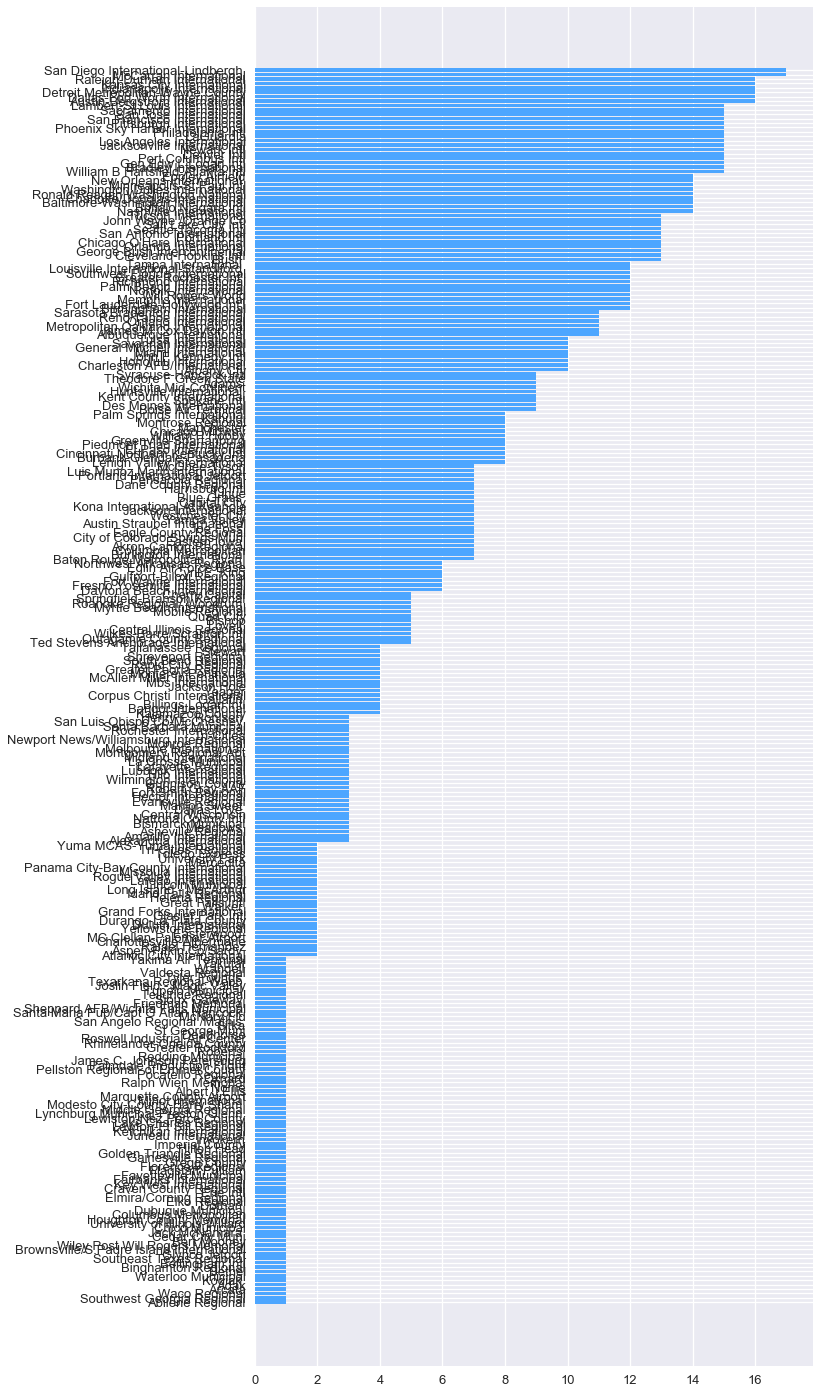

In [276]:
fig = plt.figure(figsize=(10,25))
ax1 = fig.add_subplot(1,1,1)
plt.barh(airport_count_carriers_df.airport,airport_count_carriers_df.CarriersCount);

- I have to many airport rows -- around 280s rows.
- Therefore need alternative plots other than barh to visualize data.
- First, I will use scatter plot. 
- Then I will use plotly.

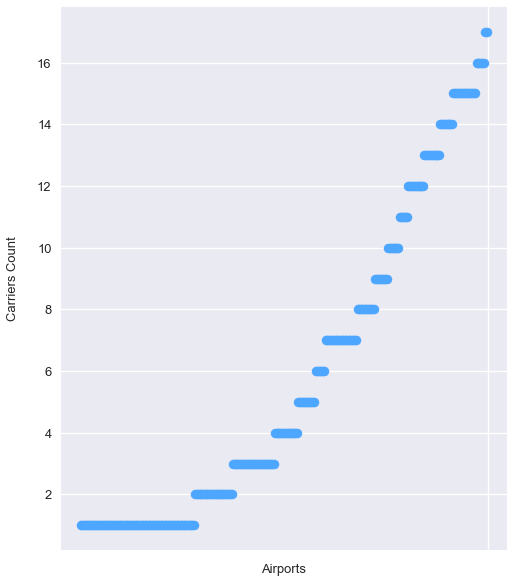

In [277]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1,1,1)
plt.scatter(airport_count_carriers_df.airport,airport_count_carriers_df.CarriersCount)
plt.xticks('');
plt.ylabel('Carriers Count\n',fontsize=13)
plt.xlabel('Airports',fontsize=13);

- Enter Comment here

#### Now use plotly to visualize data

In [278]:
airport_count_carriers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 280
Data columns (total 8 columns):
iata             281 non-null object
CarriersCount    281 non-null int64
airport          281 non-null object
city             281 non-null object
state            281 non-null object
country          281 non-null object
lat              281 non-null float64
long             281 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 19.8+ KB


In [279]:
airport_count_carriers_df['text'] = airport_count_carriers_df['airport'] + '' + airport_count_carriers_df['city'] +\
    ', ' + airport_count_carriers_df['state'] + '' + 'Count: ' + airport_count_carriers_df['CarriersCount'].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = airport_count_carriers_df['long'],
        lat = airport_count_carriers_df['lat'],
        text = airport_count_carriers_df['text'],
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'round',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 1,
            color = airport_count_carriers_df['CarriersCount'],
            cmax = airport_count_carriers_df['CarriersCount'].max(),
            colorbar=dict(
                title="Number of Airline Carriers"
            )
        ))]

layout = dict(
        title = 'Number of Airline Carriers Operating in an Airport Origin<br>(Hover for airport names)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='andy-airports-origin' )

> From the map above, most airports cluster on the East coast. There are also many airports in Alaska and Hawaii states.

#### Another look with cmin=10. Airports with at least 10 airline carriers

In [280]:
airport_count_carriers_df['text'] = airport_count_carriers_df['airport'] + '' + airport_count_carriers_df['city'] +\
    ', ' + airport_count_carriers_df['state'] + '' + 'Count: ' + airport_count_carriers_df['CarriersCount'].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = airport_count_carriers_df['long'],
        lat = airport_count_carriers_df['lat'],
        text = airport_count_carriers_df['text'],
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'round',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 10,
            color = airport_count_carriers_df['CarriersCount'],
            cmax = airport_count_carriers_df['CarriersCount'].max(),
            colorbar=dict(
                title="Numbe of Airline Carriers"
            )
        ))]

layout = dict(
        title = 'Number of Airline Carriers Operating in an Airport Origin<br>cmin=10 -- lowest airport is 10<br>(Hover for airport names)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='andy-airports2-origin' )

> With cmin=10, airports with at least 10 carriers tend to concentrate along coast lines, mid-west and Texas. Investigate the airports in the central areas such as ... 

## 14.2 Categorizing Airport Size
#### Define
- Now that we have information about how many Carriers each Airport operates, it is time to categorize Airport size based on how many Carriers it operates.
- First, merge airport_count_carriers_df and y_2008_df. I want the CarriersCount data.

#### Code

In [281]:
airport_count_carriers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 280
Data columns (total 9 columns):
iata             281 non-null object
CarriersCount    281 non-null int64
airport          281 non-null object
city             281 non-null object
state            281 non-null object
country          281 non-null object
lat              281 non-null float64
long             281 non-null float64
text             281 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 22.0+ KB


In [282]:
columns_desired = list(y_2008_df.columns)
columns_desired.append('CarriersCount')

In [283]:
airport_count_carriers_df.columns = ['Origin','CarriersCount','airport','city','state','country'\
                         ,'lat','long','text']

In [284]:
#merge airport_count_carriers_df and y_2008_df
y_2008_df = pd.merge(y_2008_df,airport_count_carriers_df,on='Origin',how='inner')[columns_desired]

#### Test

In [285]:
y_2008_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602914 entries, 0 to 602913
Data columns (total 32 columns):
UniqueCarrier         602914 non-null object
CarrierDescription    602914 non-null object
DepTime               585665 non-null datetime64[ns]
CRSDepTime            602914 non-null datetime64[ns]
ArrTime               584341 non-null datetime64[ns]
CRSArrTime            602825 non-null datetime64[ns]
FlightNum             602914 non-null int64
TailNum               592993 non-null object
ActualElapsedTime     584341 non-null float64
CRSElapsedTime        602808 non-null float64
AirTime               584341 non-null float64
ArrDelay              584341 non-null float64
DepDelay              585665 non-null float64
Origin                602914 non-null object
Dest                  602914 non-null object
Distance              602914 non-null int64
TaxiIn                584341 non-null float64
TaxiOut               585665 non-null float64
Cancelled             602914 non-null bool

- We have CarriersCount data in y_2008_df

#### Define
- Not it's time to categorize Airport size

#### Code

In [286]:
airport_count_carriers_df.CarriersCount.describe()

count    281.000000
mean       5.807829
std        4.926467
min        1.000000
25%        1.000000
50%        4.000000
75%        9.000000
max       17.000000
Name: CarriersCount, dtype: float64

In [287]:
percentile_25th = np.percentile(airport_count_carriers_df.CarriersCount,25)  # 25 percentilenp
percentile_50th = np.percentile(airport_count_carriers_df.CarriersCount,50)  # 50th percentile
percentile_75th = np.percentile(airport_count_carriers_df.CarriersCount,75)  # 75 percentile

In [288]:
def allocate_airport_sized(series):
    #print(series)
    row = series
    #if row <= 1:
    if row <= percentile_25th:
        #print('v_small_sized')
        return 'v_small_sized'
        #y_2008_df.loc[indx,'airport_sized'] = 'v_small_sized'
    elif percentile_25th < row <= percentile_50th:
    #elif 1 < row <= 10:
        #print('small_sized')
        return 'small_sized'
        #y_2008_df.loc[indx,'airport_sized'] = 'small_sized'
    elif percentile_50th < row <= percentile_75th:
    #elif 10 < row <= 14:
        #print('mid_sized')
        return 'mid_sized'
        #y_2008_df.loc[indx,'airport_sized'] = 'mid_sized'
    elif percentile_75th < row:
    #elif 14 < row <= 20:
        #print('big_sized')
        return 'big_sized'
        #y_2008_df.loc[indx,'airport_sized'] = 'big_sized'
    else:
        #print('eroor')
        return series

In [289]:
#y_2008_df['airport_sized'] = 0

In [290]:
y_2008_df['airport_sized'] = y_2008_df.CarriersCount.apply(allocate_airport_sized)

In [291]:
y_2008_df.airport_sized.value_counts()

big_sized        489173
mid_sized         76473
small_sized       28277
v_small_sized      8991
Name: airport_sized, dtype: int64

#### make `airport_sized` into category with sorted order

In [292]:
airport_size_categories = ['v_small_sized','small_sized','mid_sized','big_sized']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    airport_classes = pd.api.types.CategoricalDtype(ordered = True, categories = airport_size_categories)
    y_2008_df['airport_sized'] = y_2008_df['airport_sized'].astype(airport_classes)
else: # pre-v0.21
    y_2008_df['airport_sized'] = y_2008_df['airport_sized'].astype('category', ordered = True,
                                                         categories = airport_size_categories)

#### Test

In [293]:
y_2008_df.airport_sized.dtype

CategoricalDtype(categories=['v_small_sized', 'small_sized', 'mid_sized', 'big_sized'], ordered=True)

- airport_sized is a category type and sorted!

# 15. Exploring FlightNum

In [294]:
y_2008_df.FlightNum.isnull().sum()

0

- No null values or very few null values for FlightNum. Seems promising

In [295]:
y_2008_df.groupby(['FlightNum','CarrierDescription']).count().head(15)

UniqueCarrier  DepTime  CRSDepTime  \
FlightNum CarrierDescription                                               
1         Alaska Airlines Inc.                   62       62          62   
          American Airlines Inc.                 31       31          31   
          Continental Air Lines Inc.             31       31          31   
          Delta Air Lines Inc.                   31       31          31   
          Expressjet Airlines Inc.               31       31          31   
          Hawaiian Airlines Inc.                 31       31          31   
          JetBlue Airways                        39       39          39   
          Southwest Airlines Co.                 50       47          50   
          US Airways Inc.                        31       30          31   
          United Air Lines Inc.                  31       31          31   
2         Alaska Airlines Inc.                   62       62          62   
          American Airlines Inc.                 31       31          31   
          Continental Air Lines Inc.             31       31          31   
          Expressjet Airlines Inc.               93       93          93   
          Hawaiian Airlines Inc.                 31       31          31   

                                      ArrTime  CRSArrTime  TailNum  \
FlightNum CarrierDescription                                         
1         Alaska Airlines Inc.             62          62       62   
          American Airlines Inc.           31          31       31   
          Continental Air Lines Inc.       31          31       31   
          Delta Air Lines Inc.             31          31       31   
          Expressjet Airlines Inc.         31          31       31   
          Hawaiian Airlines Inc.           31          31       31   
          JetBlue Airways                  39          39       39   
          Southwest Airlines Co.           46          50       47   
          US Airways Inc.                  30          31       30   
          United Air Lines Inc.            31          31       31   
2         Alaska Airlines Inc.             62          62       62   
          American Airlines Inc.           31          31       31   
          Continental Air Lines Inc.       31          31       31   
          Expressjet Airlines Inc.         93          93       93   
          Hawaiian Airlines Inc.           31          31       31   

                                      ActualElapsedTime  CRSElapsedTime  \
FlightNum CarrierDescription                                              
1         Alaska Airlines Inc.                       62              62   
          American Airlines Inc.                     31              31   
          Continental Air Lines Inc.                 31              31   
          Delta Air Lines Inc.                       31              31   
          Expressjet Airlines Inc.                   31              31   
          Hawaiian Airlines Inc.                     31              31   
          JetBlue Airways                            39              39   
          Southwest Airlines Co.                     46              50   
          US Airways Inc.                            30              31   
          United Air Lines Inc.                      31              31   
2         Alaska Airlines Inc.                       62              62   
          American Airlines Inc.                     31              31   
          Continental Air Lines Inc.                 31              31   
          Expressjet Airlines Inc.                   93              93   
          Hawaiian Airlines Inc.                     31              31   

                                      AirTime  ArrDelay      ...        \
FlightNum CarrierDescription                                 ...         
1         Alaska Airlines Inc.             62        62      ...         
          American Airlines Inc.           31        31 

- I expect FlightNum to be unique for each airlines/carriers. But it is not. So I don't find this column useful.

#### Drop FlightNum column. (haven't decided yet)

In [296]:
# y_2008_df.drop(columns=['FlightNum'],axis=1,inplace=True)

# 16. Exploring TailNum
#### <a href='https://en.wikipedia.org/wiki/Aircraft_registration'>From Wikipedia</a>: 

- Every civil aircraft must be marked prominently on its exterior by an alphanumeric string, indicating its country of registration and its unique serial number

In [297]:
y_2008_df.groupby(['TailNum','CarrierDescription']).count().head(3)

,,UniqueCarrier,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,NASDelay,SecurityDelay,LateAircraftDelay,CombinedDate,DepDelayM,ArrDelayM,DepTimeCategory,ArrTimeCategory,CarriersCount,airport_sized
TailNum,CarrierDescription,,,,,,,,,,,,,,,,,,,,,
80009E,Pinnacle Airlines Inc.,143,143,143,143,143,143,143,143,143,143,...,35,35,35,143,143,143,143,143,143,143
80019E,Pinnacle Airlines Inc.,183,183,183,183,183,183,183,183,183,183,...,45,45,45,183,183,183,183,183,183,183
80059E,Pinnacle Airlines Inc.,170,170,170,170,170,170,170,170,170,170,...,52,52,52,170,170,170,170,170,170,170


In [298]:
y_2008_df.TailNum.nunique()

4878

- This column seems like a promising column for analysis. For example, I can turn this into ordinal categories: Boeing 747, 737, Airbus ... And explore whether delays have to do with size and make of an aircraft. But due to time constraint, I will not explore further.

#### Drop TailNum column (maybe)

In [299]:
#y_2008_df.drop(columns=['TailNum'],axis=1,inplace=True)

# 17. Exploring Actual/CRS ElapsedTime, AirTime, Distance

In [300]:
desired_cols = ['ActualElapsedTime','AirTime','ArrDelayM','DepDelayM','Distance','CarriersCount']

In [301]:
#desired_cols = ['ActualElapsedTime','AirTime','ArrDelayM','DepDelayM','Distance']

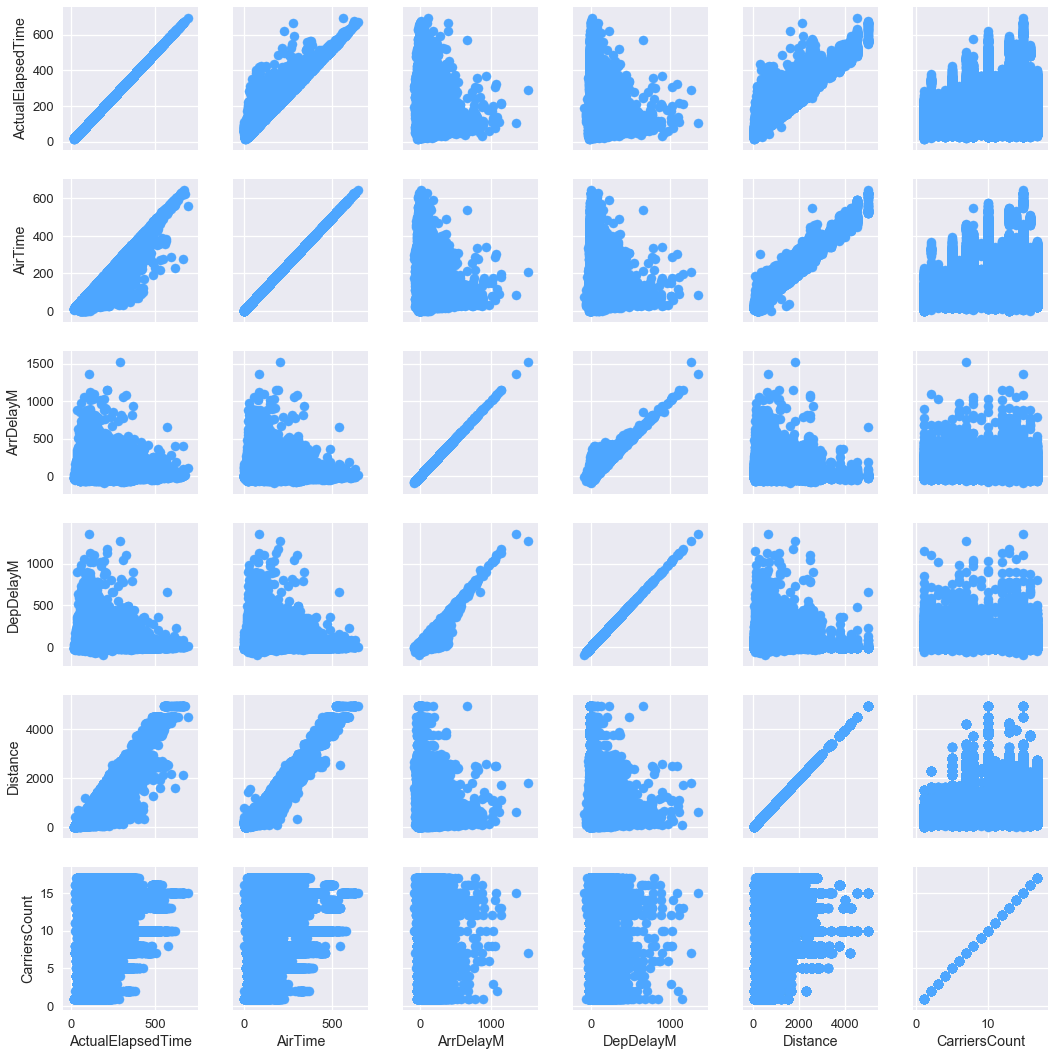

In [302]:
g = sb.PairGrid(data=y_2008_df,vars=desired_cols)
#g = g.map_diag(plt.hist,bins=20)
g.map(plt.scatter);
#g.map_offdiag(plt.scatter)

In [303]:
y_2008_df[desired_cols].corr()

,ActualElapsedTime,AirTime,ArrDelayM,DepDelayM,Distance,CarriersCount
ActualElapsedTime,1.000000,0.984855,0.072342,0.027565,0.957740,0.161777
AirTime,0.984855,1.000000,0.015981,0.012070,0.975393,0.154928
ArrDelayM,0.072342,0.015981,1.000000,0.931283,-0.014943,-0.012286
DepDelayM,0.027565,0.012070,0.931283,1.000000,0.013187,0.004665
Distance,0.957740,0.975393,-0.014943,0.013187,1.000000,0.173208
CarriersCount,0.161777,0.154928,-0.012286,0.004665,0.173208,1.000000


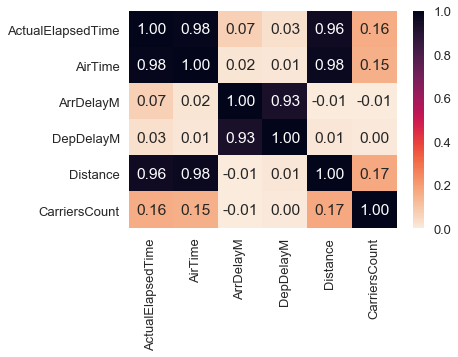

In [304]:
sb.heatmap(y_2008_df[desired_cols].corr(),annot=True,cmap='rocket_r',fmt='.2f',vmin=0)

# 18. Exploring TaxiIn and TaxiOut

# 19. Visualizing Data

#### comment here

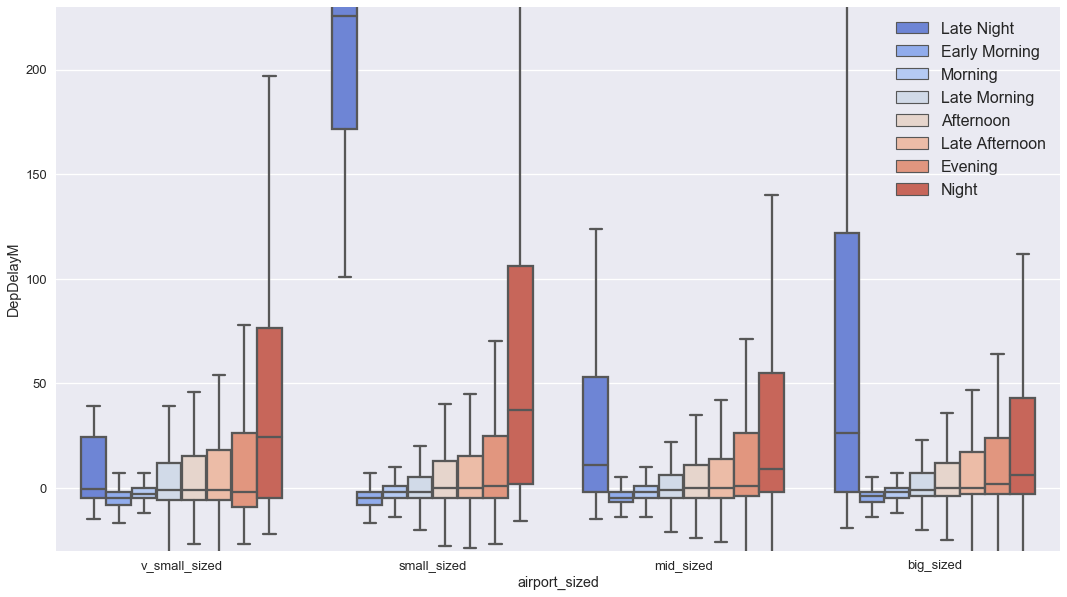

In [305]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(1,1,1)
sb.boxplot(data=y_2008_df,y=y_2008_df.DepDelayM,x=y_2008_df.airport_sized,hue='DepTimeCategory'\
          ,showfliers=False,palette='coolwarm')
plt.ylim(-30,230);
plt.legend(fontsize=16);

#### plot title here

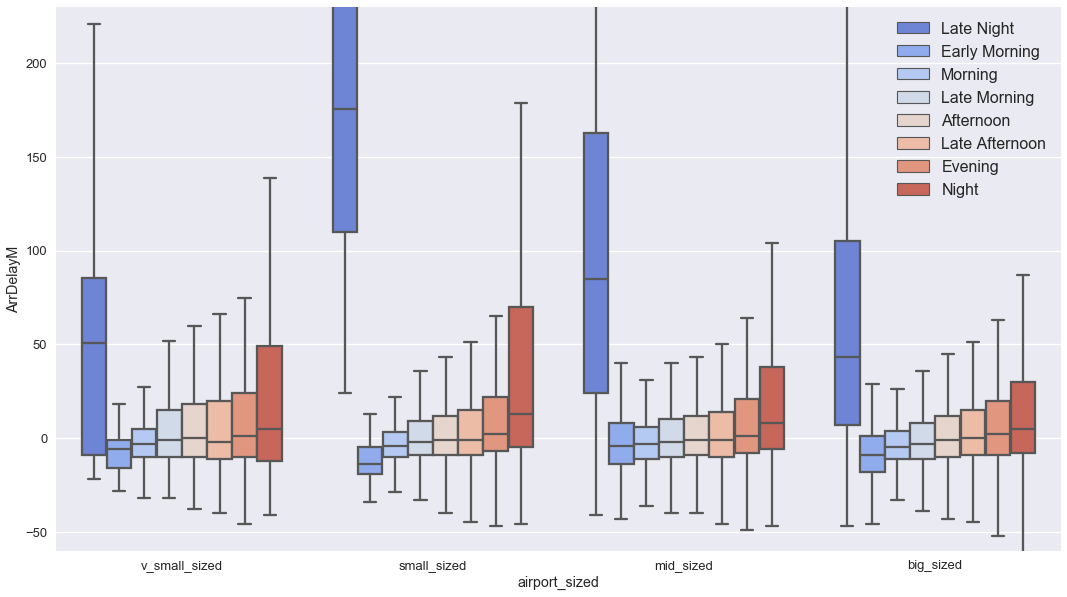

In [306]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(1,1,1)
sb.boxplot(data=y_2008_df,y=y_2008_df.ArrDelayM,x=y_2008_df.airport_sized,hue='ArrTimeCategory'\
          ,showfliers=False,palette='coolwarm')
plt.ylim(-60,230)
plt.legend(fontsize=16);

#### plot title here

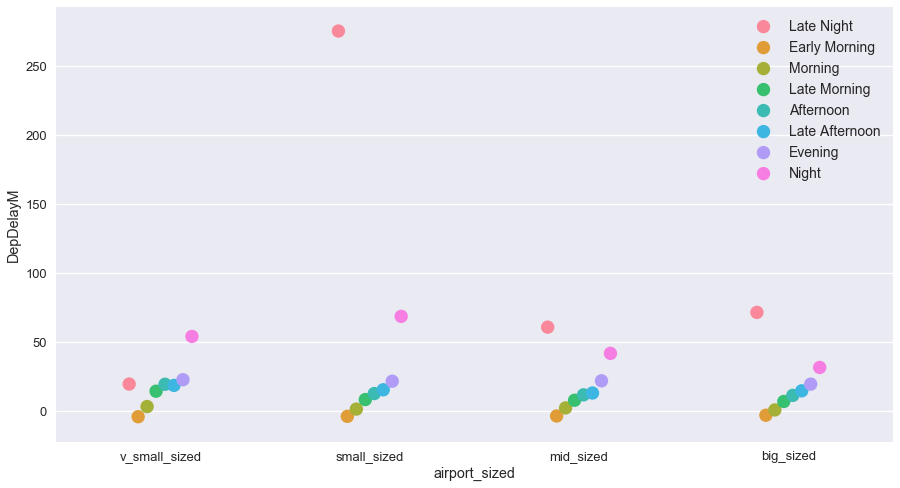

In [307]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
sb.pointplot(data=y_2008_df,y=y_2008_df.DepDelayM,x=y_2008_df.airport_sized,hue='DepTimeCategory',ci=None,
            linestyles='',dodge=0.3,)
plt.legend(fontsize=14);

#### plot title there

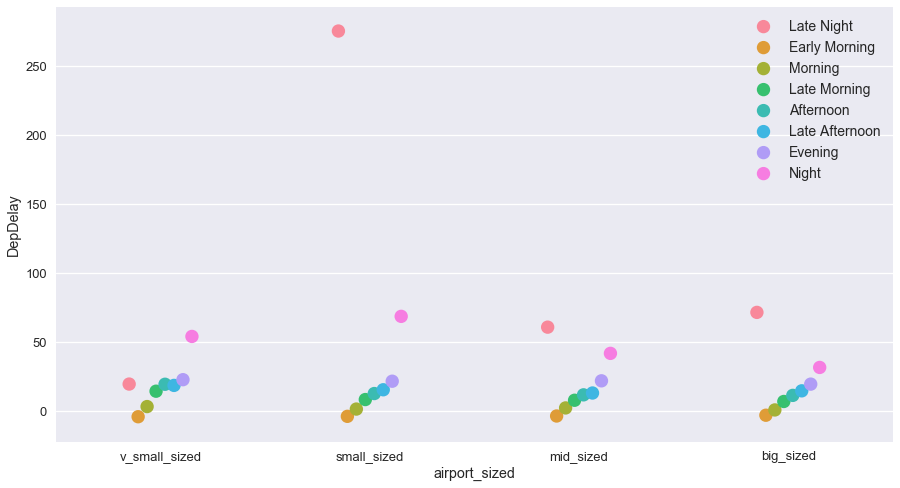

In [308]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
sb.pointplot(data=y_2008_df,y=y_2008_df.DepDelay,x=y_2008_df.airport_sized,hue='DepTimeCategory',ci=None,
            linestyles='',dodge=0.3)
plt.legend(fontsize=14);

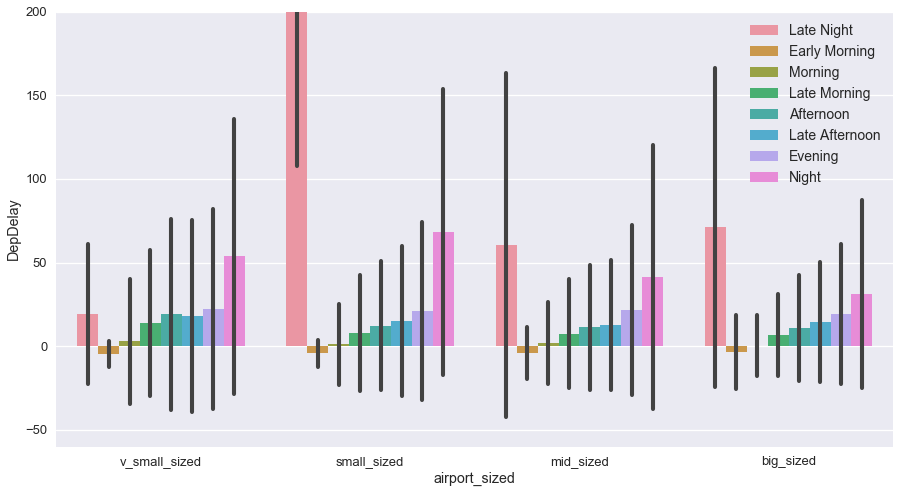

In [309]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
sb.barplot(data=y_2008_df,y=y_2008_df.DepDelay,x=y_2008_df.airport_sized,hue='DepTimeCategory',ci='sd')
plt.legend(fontsize=14);
plt.ylim(-60,200);

In [310]:
plot_data = y_2008_df[(~y_2008_df.DepDelayM.isnull())]

In [311]:
ordered_data_df= plot_data[['CarrierDescription','DepDelayM']]

In [312]:
ordered_data_df.head()

,CarrierDescription,DepDelayM
0,Pinnacle Airlines Inc.,30.0
1,Pinnacle Airlines Inc.,-5.0
2,Pinnacle Airlines Inc.,1.0
3,Pinnacle Airlines Inc.,2.0
4,Pinnacle Airlines Inc.,-5.0


In [313]:
ordered_data_df.groupby('CarrierDescription').mean()

,DepDelayM
CarrierDescription,
AirTran Airways Corporation,5.741566
Alaska Airlines Inc.,9.798670
Aloha Airlines Inc.,-0.838790
American Airlines Inc.,15.842565
American Eagle Airlines Inc.,14.538766
Atlantic Southeast Airlines,13.081061
Comair Inc.,8.657056
Continental Air Lines Inc.,9.066752
Delta Air Lines Inc.,5.756076


In [314]:
#plot_data = y_2008_df[(~y_2008_df.DepDelayM.isnull()) & (y_2008_df.DepTimeCategory!='Late Night')]

In [315]:
plot_data.columns

Index(['UniqueCarrier', 'CarrierDescription', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'CombinedDate', 'DepDelayM', 'ArrDelayM',
       'DepTimeCategory', 'ArrTimeCategory', 'CarriersCount', 'airport_sized'],
      dtype='object')

In [316]:
plot_data.groupby('CarrierDescription')['DepDelayM'].mean().describe()

count    20.000000
mean      9.690948
std       5.608227
min      -2.481043
25%       6.518148
50%       9.432711
75%      13.953490
max      20.777427
Name: DepDelayM, dtype: float64

In [317]:
order_index = plot_data.groupby('CarrierDescription')['DepDelayM'].mean().sort_values().index

#### Consider putting the number of flights each carriers flies as hue or size.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

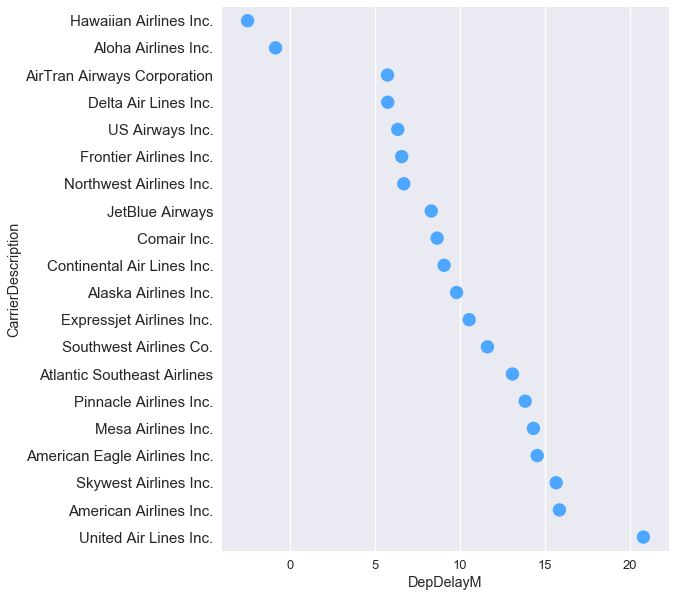

In [318]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1,1,1)
sb.pointplot(data=plot_data,y='CarrierDescription',x='DepDelayM',linestyles='',ci=None,order=order_index)
plt.yticks(fontsize=15)

In [319]:
y_2008_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602914 entries, 0 to 602913
Data columns (total 33 columns):
UniqueCarrier         602914 non-null object
CarrierDescription    602914 non-null object
DepTime               585665 non-null datetime64[ns]
CRSDepTime            602914 non-null datetime64[ns]
ArrTime               584341 non-null datetime64[ns]
CRSArrTime            602825 non-null datetime64[ns]
FlightNum             602914 non-null int64
TailNum               592993 non-null object
ActualElapsedTime     584341 non-null float64
CRSElapsedTime        602808 non-null float64
AirTime               584341 non-null float64
ArrDelay              584341 non-null float64
DepDelay              585665 non-null float64
Origin                602914 non-null object
Dest                  602914 non-null object
Distance              602914 non-null int64
TaxiIn                584341 non-null float64
TaxiOut               585665 non-null float64
Cancelled             602914 non-null bool

# Savings Data

In [320]:
#y_2008_full_df = pd.read_csv('../data_flight/2008/2008.csv')
#carriers_df = pd.read_csv('../data_flight/supplement/carriers.csv')
#airports_df = pd.read_csv('../data_flight/supplement/airports.csv')

In [321]:
y_2008_df.to_csv('../y_2008_january_data',index=False)